In [ ]:
pip install matplotlib seaborn pandas

In [ ]:
pip install imbalanced-learn

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
from imblearn.over_sampling import SMOTE
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
path ="/content/drive/MyDrive/botnet_dataset/Philips_B120N10_Baby_Monitor.csv"
df=pd.read_csv(path)
df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000            60.0        0.000000e+00          1.000000   
1          1.000000            60.0        0.000000e+00          1.000000   
2          1.000000           342.0        0.000000e+00          1.000000   
3          1.963325           342.0        4.370000e-11          1.977831   
4          1.000000            60.0        0.000000e+00          1.000000   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0            60.0                 0.0          1.000000            60.0   
1            60.0                 0.0          1.000000            60.0   
2           342.0                 0.0          1.000000           342.0   
3           342.0                 0.0          1.992555           342.0   
4            60.0                 0.0          1.000000            60.0   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0                 0.0     1.000000  ...        1.000000     60.000000   
1                 0.0     1.000000  ...        1.000000     60.000000   
2                 0.0     1.000000  ...        1.000018    342.004453   
3                 0.0     1.963325  ...        1.977848    342.002201   
4                 0.0     1.000000  ...        1.000000     60.000000   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0     0.000000                 0.0          0.0        1.000000     60.000000   
1     0.000000                 0.0          0.0        1.000000     60.000000   
2     1.050836                 0.0          0.0        1.041566    351.897004   
3     0.738884                 0.0          0.0        2.033812    347.030770   
4     0.000000                 0.0          0.0        1.000000     60.000000   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0     0.000000                 0.0          0.0  
1     0.000000                 0.0          0.0  
2    48.543860                 0.0          0.0  
3    34.961725                 0.0          0.0  
4     0.000000                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
print(df.columns)

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'H_L5_weight', 'H_L5_mean', 'H_L5_variance', 'H_L3_weight', 'H_L3_mean',
       'H_L3_variance', 'H_L1_weight', 'H_L1_mean', 'H_L1_variance',
       'HH_L5_weight', 'HH_L5_mean', 'HH_L5_std', 'HH_L5_covariance',
       'HH_L5_pcc', 'HH_L3_weight', 'HH_L3_mean', 'HH_L3_std',
       'HH_L3_covariance', 'HH_L3_pcc', 'HH_L1_weight', 'HH_L1_mean',
       'HH_L1_std', 'HH_L1_covariance', 'HH_L1_pcc', 'HH_jit_L5_weight',
       'HH_jit_L5_mean', 'HH_jit_L5_variance', 'HH_jit_L3_weight',
       'HH_jit_L3_mean', 'HH_jit_L3_variance', 'HH_jit_L1_weight',
       'HH_jit_L1_mean', 'HH_jit_L1_variance', 'HpHp_L5_weight',
       'HpHp_L5_mean', 'HpHp_L5_std', 'HpHp_L5_covariance', 'HpHp_L5_pcc',
       'HpHp_L3_weight', 'HpHp_L3_mean', 'HpHp_L3_std', 'HpHp_L3_covariance',
       'HpHp_L3_pcc', 

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
MI_dir_L5_weight      0
MI_dir_L5_mean        0
MI_dir_L5_variance    0
MI_dir_L3_weight      0
MI_dir_L3_mean        0
MI_dir_L3_variance    0
MI_dir_L1_weight      0
MI_dir_L1_mean        0
MI_dir_L1_variance    0
H_L5_weight           0
H_L5_mean             0
H_L5_variance         0
H_L3_weight           0
H_L3_mean             0
H_L3_variance         0
H_L1_weight           0
H_L1_mean             0
H_L1_variance         0
HH_L5_weight          0
HH_L5_mean            0
HH_L5_std             0
HH_L5_covariance      0
HH_L5_pcc             0
HH_L3_weight          0
HH_L3_mean            0
HH_L3_std             0
HH_L3_covariance      0
HH_L3_pcc             0
HH_L1_weight          0
HH_L1_mean            0
HH_L1_std             0
HH_L1_covariance      0
HH_L1_pcc             0
HH_jit_L5_weight      0
HH_jit_L5_mean        0
HH_jit_L5_variance    0
HH_jit_L3_weight      0
HH_jit_L3_mean        0
HH_jit_L3_variance    0
HH_jit_L1_weight      0
HH_jit_L1_mean        0

Null values in DataFrame:
        MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
0                  False           False               False   
1                  False           False               False   
2                  False           False               False   
3                  False           False               False   
4                  False           False               False   
...                  ...             ...                 ...   
175235             False           False               False   
175236             False           False               False   
175237             False           False               False   
175238             False           False               False   
175239             False           False               False   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
0                  False           False               False   
1                  False           False               False   
2            

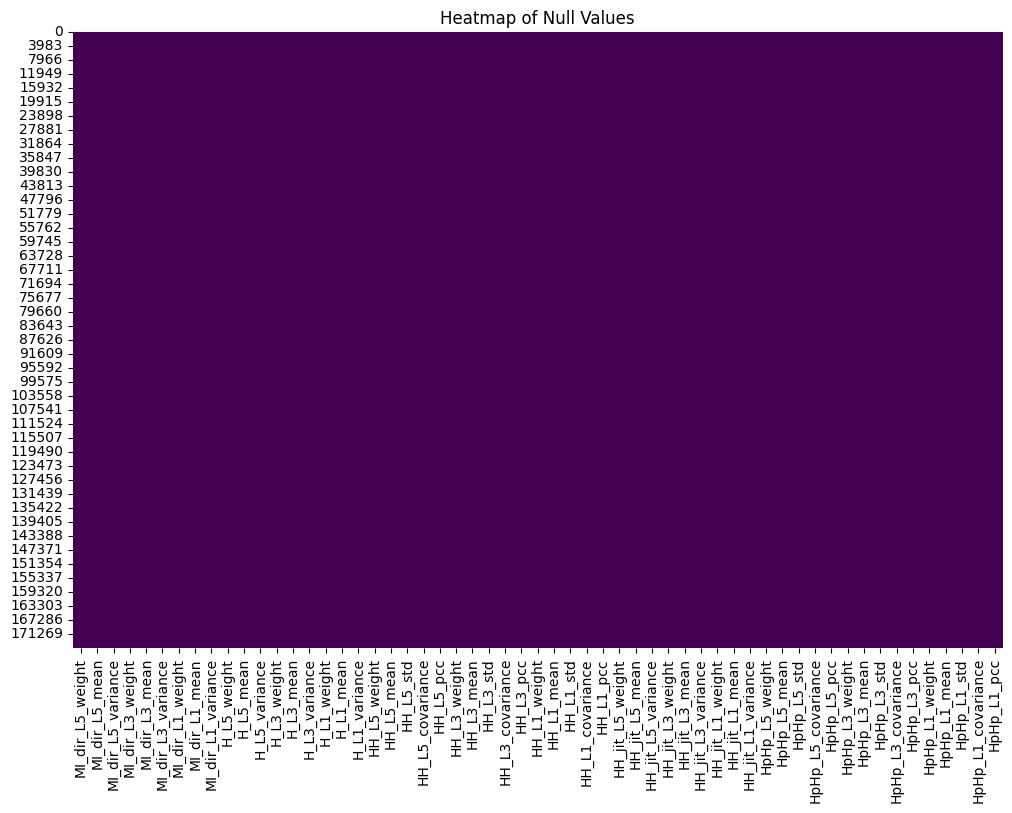

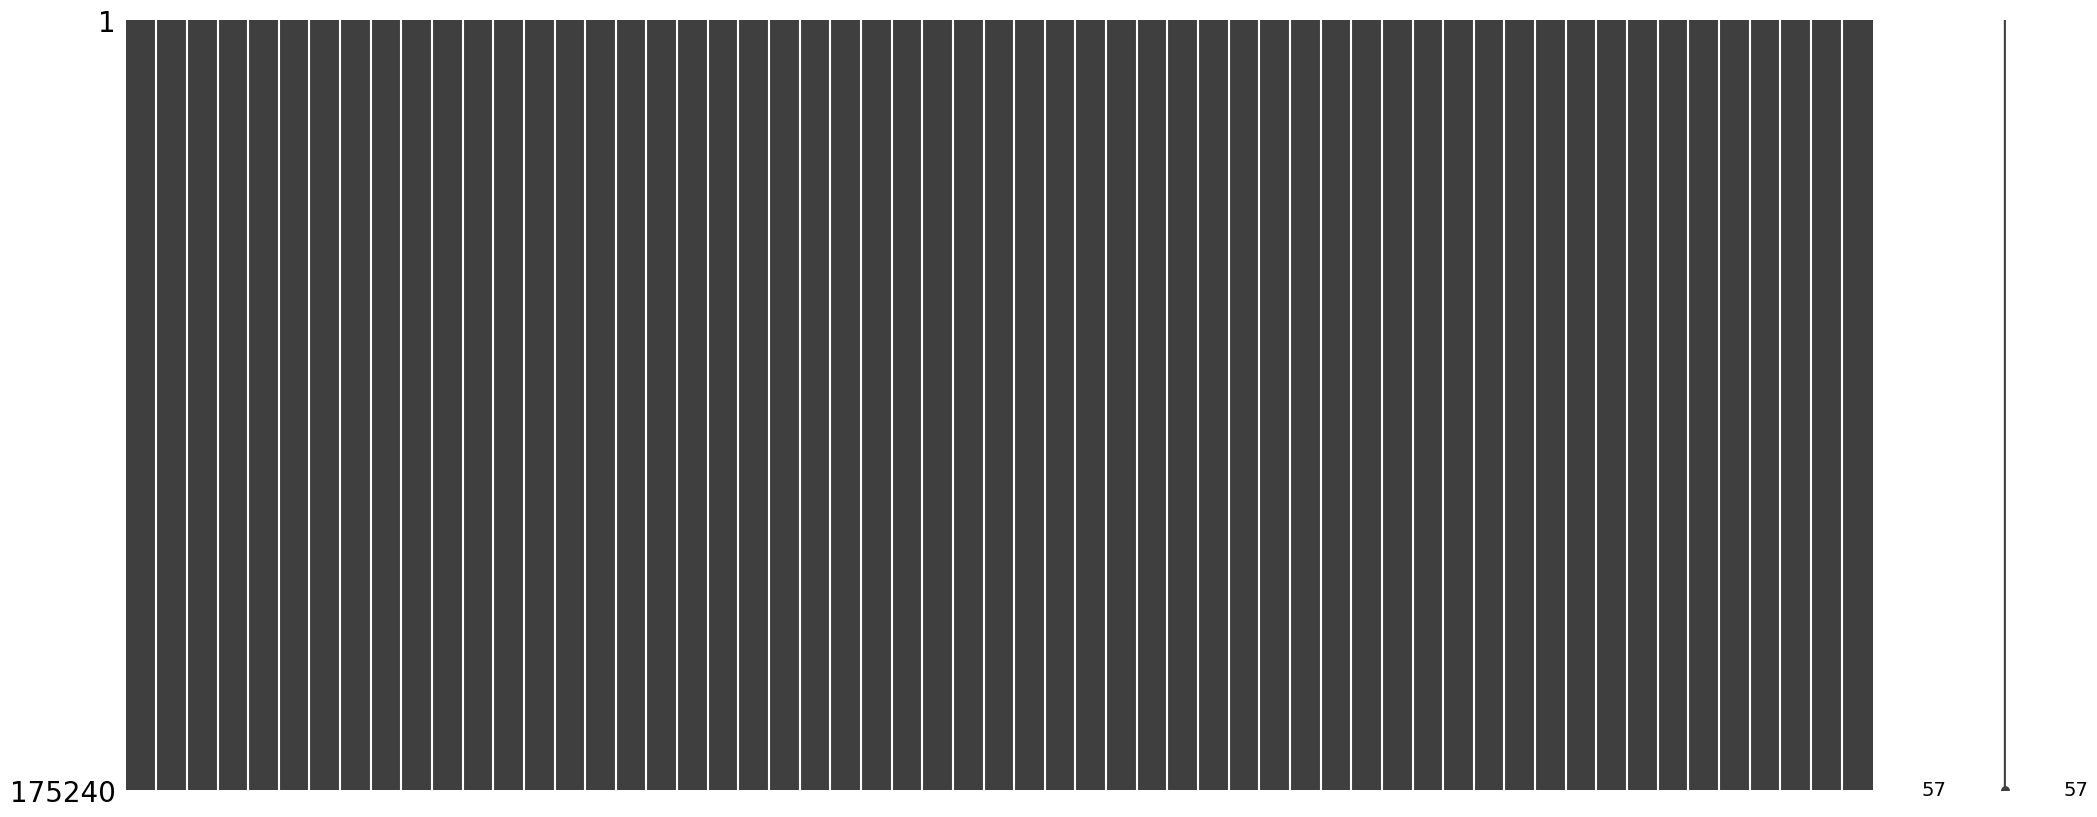

In [ ]:
# Check for null values
print("Null values in DataFrame:")
print(df.isnull())

# Count null values per column
print("\nCount of null values per column:")
print(df.isnull().sum())

# Display rows with null values
print("\nRows with null values:")
print(df[df.isnull().any(axis=1)])

# Visualize null values with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Null Values')
plt.show()

# Visualize missing values matrix
msno.matrix(df)
plt.show()

In [ ]:
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
MI_dir_L5_weight      float64
MI_dir_L5_mean        float64
MI_dir_L5_variance    float64
MI_dir_L3_weight      float64
MI_dir_L3_mean        float64
MI_dir_L3_variance    float64
MI_dir_L1_weight      float64
MI_dir_L1_mean        float64
MI_dir_L1_variance    float64
H_L5_weight           float64
H_L5_mean             float64
H_L5_variance         float64
H_L3_weight           float64
H_L3_mean             float64
H_L3_variance         float64
H_L1_weight           float64
H_L1_mean             float64
H_L1_variance         float64
HH_L5_weight          float64
HH_L5_mean            float64
HH_L5_std             float64
HH_L5_covariance      float64
HH_L5_pcc             float64
HH_L3_weight          float64
HH_L3_mean            float64
HH_L3_std             float64
HH_L3_covariance      float64
HH_L3_pcc             float64
HH_L1_weight          float64
HH_L1_mean            float64
HH_L1_std             float64
HH_L1_covariance      float64
HH_L1_pcc    

In [ ]:
max_values = df.max()
min_values = df.min()

print("Maximum values for each feature:")
print(max_values)

print("\nMinimum values for each feature:")
print(min_values)

Maximum values for each feature:
MI_dir_L5_weight      7.931131e+01
MI_dir_L5_mean        1.452697e+03
MI_dir_L5_variance    4.756482e+05
MI_dir_L3_weight      1.163366e+02
MI_dir_L3_mean        1.450730e+03
MI_dir_L3_variance    4.714568e+05
MI_dir_L1_weight      2.164753e+02
MI_dir_L1_mean        1.434056e+03
MI_dir_L1_variance    4.713175e+05
H_L5_weight           7.931131e+01
H_L5_mean             1.452697e+03
H_L5_variance         4.756482e+05
H_L3_weight           1.163366e+02
H_L3_mean             1.450730e+03
H_L3_variance         4.714568e+05
H_L1_weight           2.164753e+02
H_L1_mean             1.434056e+03
H_L1_variance         4.713175e+05
HH_L5_weight          7.931104e+01
HH_L5_mean            1.452705e+03
HH_L5_std             6.869721e+02
HH_L5_covariance      3.658684e+05
HH_L5_pcc             1.758178e+00
HH_L3_weight          1.163180e+02
HH_L3_mean            1.451300e+03
HH_L3_std             6.855146e+02
HH_L3_covariance      4.327798e+05
HH_L3_pcc             

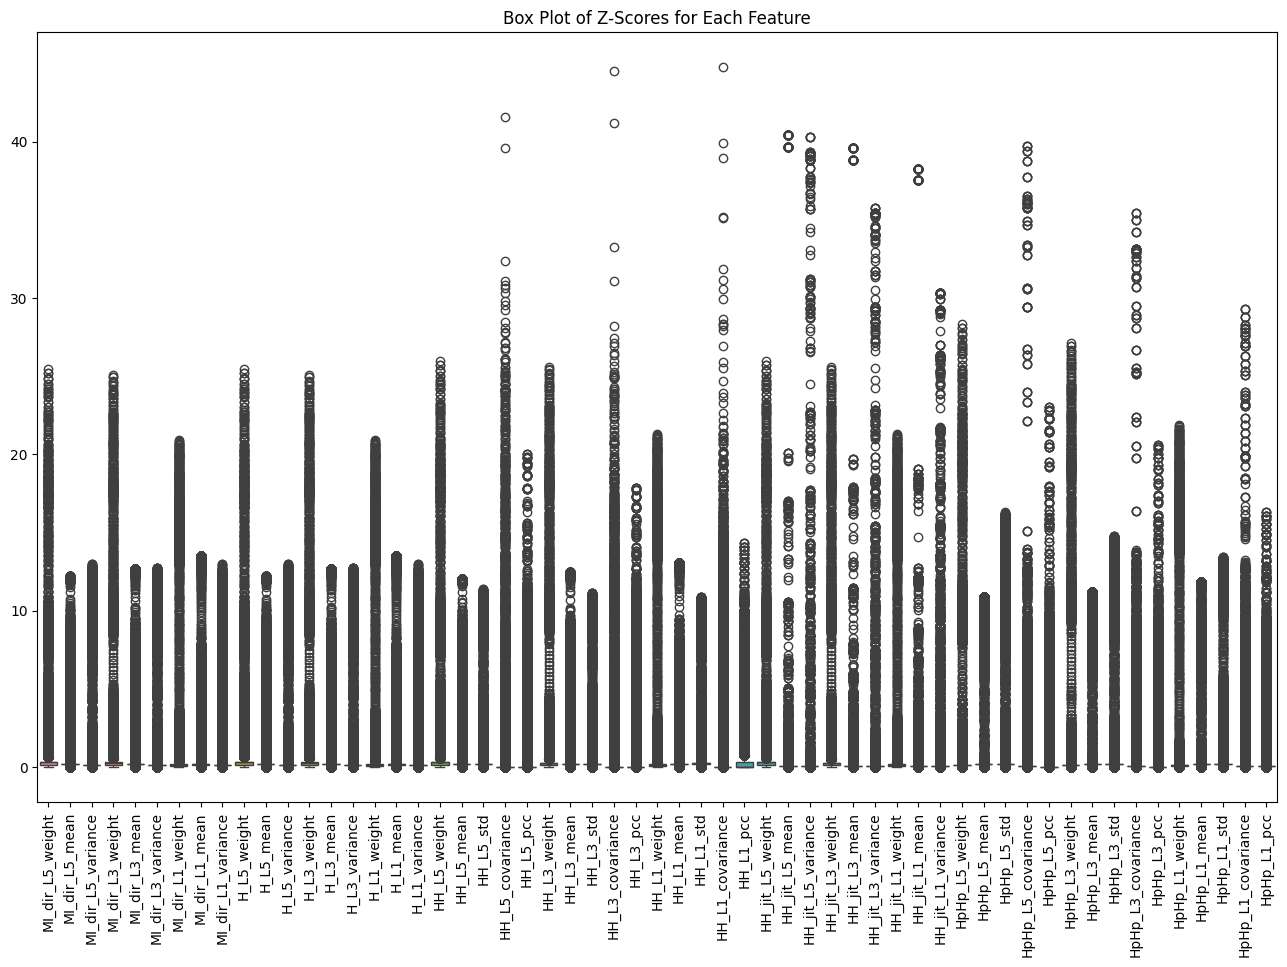

In [ ]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)
z_scores_df.head()
# Create a box plot for all features
plt.figure(figsize=(16, 10))  # Adjust the size depending on the number of features
sns.boxplot(data=z_scores_df)
plt.xticks(rotation=90)  # Rotate feature names if necessary
plt.title('Box Plot of Z-Scores for Each Feature')
plt.show()
# Calculate max Z-score for each feature
max_z_scores = z_scores_df.max()

# Plot the max Z-scores for each feature
plt.figure(figsize=(16, 6))
plt.bar(max_z_scores.index, max_z_scores.values)
plt.axhline(y=3, color='r', linestyle='--')  # Outlier threshold
plt.xticks(rotation=90)
plt.title('Max Z-Scores for Each Feature')
plt.show()

In [ ]:
threshold = 3

# Identify outliers for each feature
outliers = (z_scores_df > threshold)

# Display the rows and features that are outliers
outliers_summary = df[outliers.any(axis=1)]
print(f"Number of rows with outliers: {outliers_summary.shape[0]}")

# Display the first few rows with outliers
outliers_summary.head()

Number of rows with outliers: 10037


MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000            0.000000          1.000000   
4          1.000000       60.000000            0.000000          1.000000   
5          1.981224       67.571077           56.244948          1.988692   
6          2.336336       70.322789           42.289572          2.570206   
7          2.572236       68.642232           30.289211          3.026551   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
4       60.000000            0.000000          1.000000       60.000000   
5       67.542647           56.248181          1.996216       67.514216   
6       70.055034           44.274766          2.845032       69.793903   
7       68.715214           33.283877          3.628353       68.748276   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0            0.000000     1.000000  ...        1.000000     60.000000   
4            0.000000     1.000000  ...        1.000000     60.000000   
5           56.249798     1.981224  ...        1.000000     75.000000   
6           46.067150     2.336336  ...        1.000000     74.000000   
7           36.244386     2.572236  ...        1.788478     69.526923   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0     0.000000                 0.0          0.0        1.000000     60.000000   
4     0.000000                 0.0          0.0        1.000000     60.000000   
5     0.000000                 0.0          0.0        1.000000     75.000000   
6     0.000000                 0.0          0.0        1.000000     74.000000   
7     3.971926                 0.0          0.0        1.923839     69.841649   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0     0.000000                 0.0          0.0  
4     0.000000                 0.0          0.0  
5     0.000000                 0.0          0.0  
6     0.000000                 0.0          0.0  
7     3.996864                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
# Count of outliers per feature
outlier_counts_per_feature = outliers.sum()

# Print the number of outliers per feature
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

Number of outliers per feature:
MI_dir_L5_weight      1582
MI_dir_L5_mean        2215
MI_dir_L5_variance    1637
MI_dir_L3_weight      1414
MI_dir_L3_mean        2188
MI_dir_L3_variance    1664
MI_dir_L1_weight      1039
MI_dir_L1_mean        2136
MI_dir_L1_variance    1886
H_L5_weight           1582
H_L5_mean             2215
H_L5_variance         1637
H_L3_weight           1414
H_L3_mean             2188
H_L3_variance         1664
H_L1_weight           1039
H_L1_mean             2137
H_L1_variance         1886
HH_L5_weight          1429
HH_L5_mean            2213
HH_L5_std             1803
HH_L5_covariance      1452
HH_L5_pcc             4814
HH_L3_weight          1181
HH_L3_mean            2193
HH_L3_std             1903
HH_L3_covariance      1641
HH_L3_pcc             4762
HH_L1_weight           752
HH_L1_mean            2119
HH_L1_std             2120
HH_L1_covariance      1926
HH_L1_pcc             4446
HH_jit_L5_weight      1429
HH_jit_L5_mean         332
HH_jit_L5_variance     

Number of outliers per feature:
MI_dir_L5_weight      1582
MI_dir_L5_mean        2215
MI_dir_L5_variance    1637
MI_dir_L3_weight      1414
MI_dir_L3_mean        2188
MI_dir_L3_variance    1664
MI_dir_L1_weight      1039
MI_dir_L1_mean        2136
MI_dir_L1_variance    1886
H_L5_weight           1582
H_L5_mean             2215
H_L5_variance         1637
H_L3_weight           1414
H_L3_mean             2188
H_L3_variance         1664
H_L1_weight           1039
H_L1_mean             2137
H_L1_variance         1886
HH_L5_weight          1429
HH_L5_mean            2213
HH_L5_std             1803
HH_L5_covariance      1452
HH_L5_pcc             4814
HH_L3_weight          1181
HH_L3_mean            2193
HH_L3_std             1903
HH_L3_covariance      1641
HH_L3_pcc             4762
HH_L1_weight           752
HH_L1_mean            2119
HH_L1_std             2120
HH_L1_covariance      1926
HH_L1_pcc             4446
HH_jit_L5_weight      1429
HH_jit_L5_mean         332
HH_jit_L5_variance     

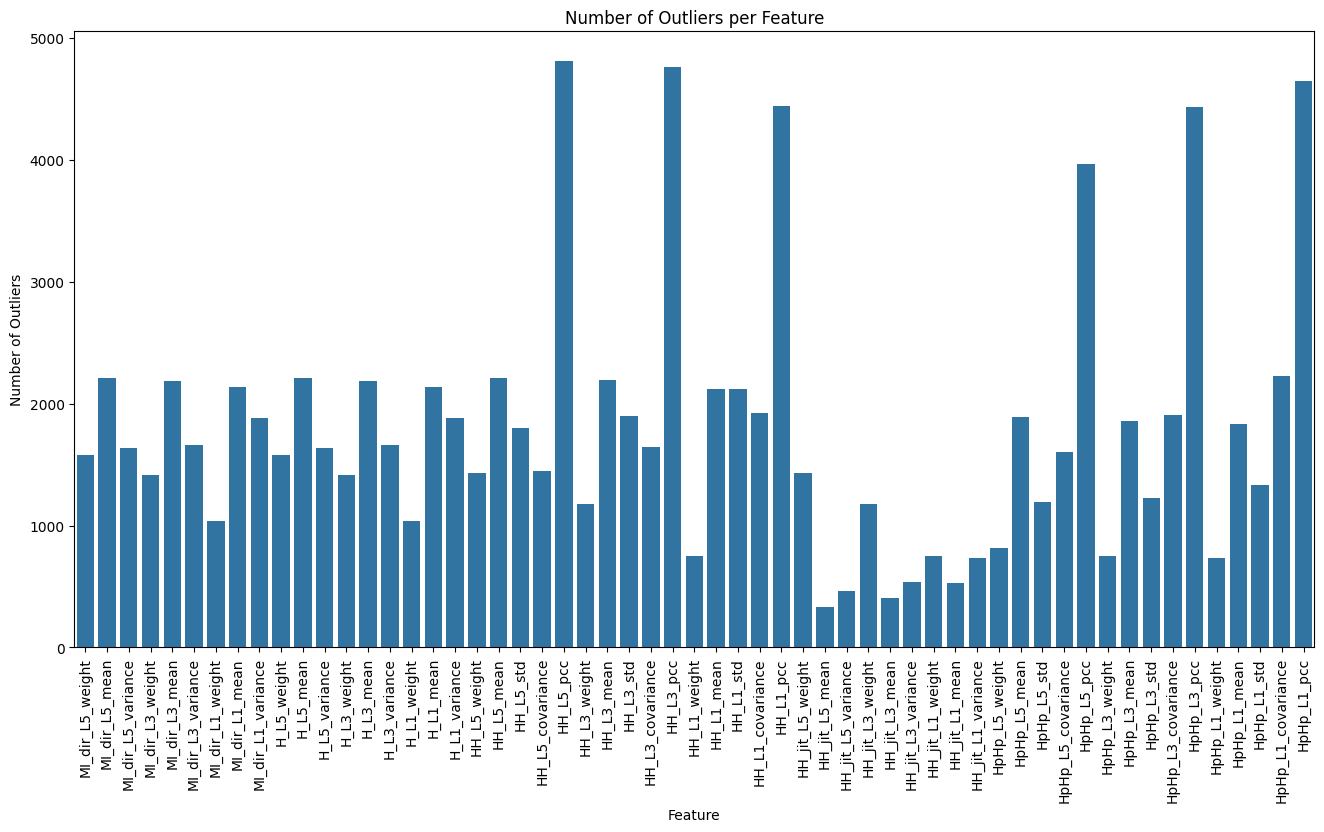

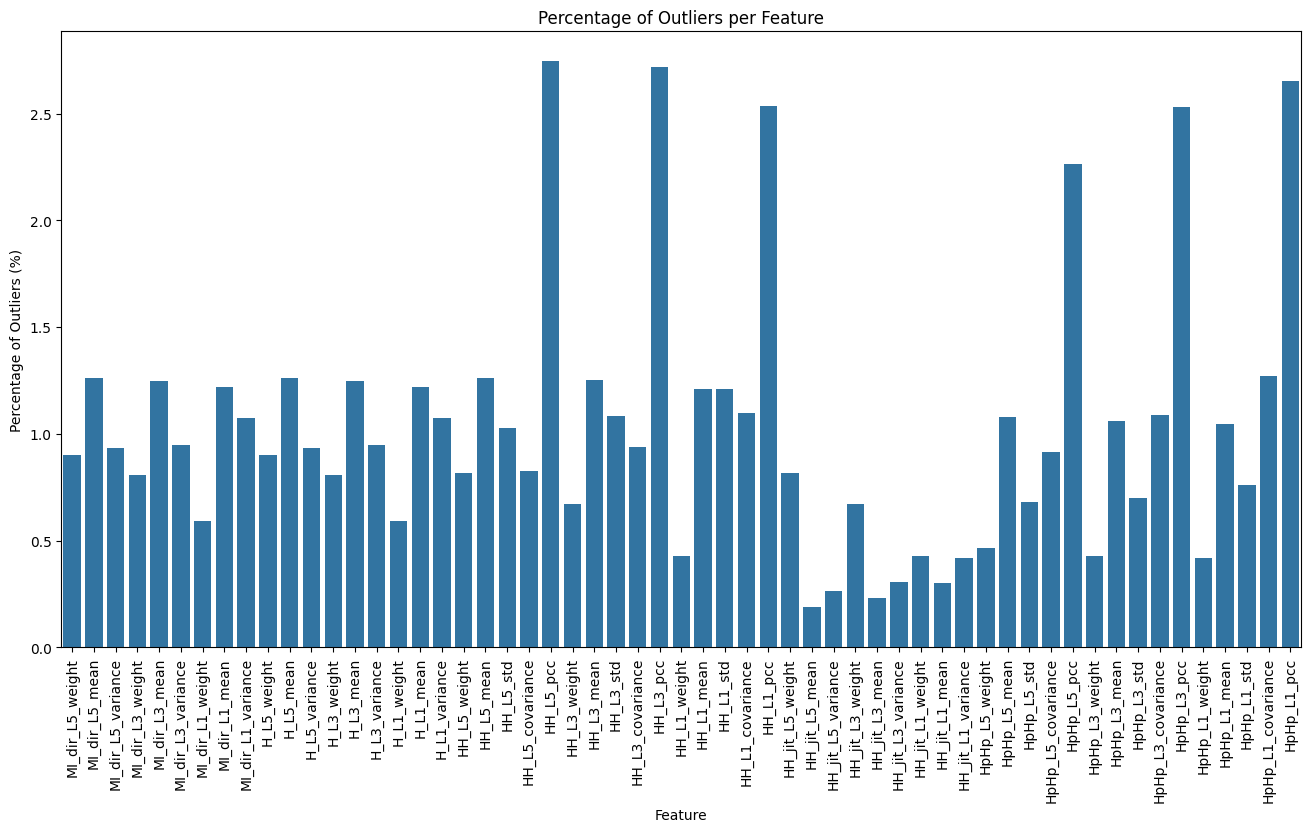

In [ ]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)

# Define threshold
threshold = 3

# Identify outliers
outliers = (z_scores_df > threshold)

# Summary of outliers
outliers_summary = df[outliers.any(axis=1)]

# Aggregate statistics for outliers
outlier_counts_per_feature = outliers.sum()
outlier_percentage_per_feature = (outlier_counts_per_feature / df.shape[0]) * 100
outliers_summary_stats = outliers_summary.describe()

# Print outlier counts and percentages
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

print("\nPercentage of outliers per feature:")
print(outlier_percentage_per_feature)

print("\nAggregated statistics for rows with outliers:")
print(outliers_summary_stats)

# Visualize number of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_counts_per_feature.index, y=outlier_counts_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers per Feature')
plt.show()

# Visualize percentage of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_percentage_per_feature.index, y=outlier_percentage_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Percentage of Outliers (%)')
plt.title('Percentage of Outliers per Feature')
plt.show()

# Visualize summary statistics for rows with outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=outliers_summary)
plt.xticks(rotation=90)
plt.title('Box Plot of Statistics for Rows with Outliers')
plt.show()

In [ ]:
# Remove rows with any outliers
df_cleaned = df[~outliers.any(axis=1)]
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

# Check the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df_cleaned.head())
print("\nSummary statistics of the cleaned dataset:")
print(df_cleaned.describe())

Original dataset shape: (175240, 57)
Cleaned dataset shape: (165203, 57)

First few rows of the cleaned dataset:
    MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
1           1.000000            60.0        0.000000e+00          1.000000   
2           1.000000           342.0        0.000000e+00          1.000000   
3           1.963325           342.0        4.370000e-11          1.977831   
21          1.000000            60.0        0.000000e+00          1.000000   
22          1.000000           342.0        0.000000e+00          1.000000   

    MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
1             60.0                 0.0          1.000000            60.0   
2            342.0                 0.0          1.000000           342.0   
3            342.0                 0.0          1.992555           342.0   
21            60.0                 0.0          1.000000            60.0   
22           342.0                 0.0

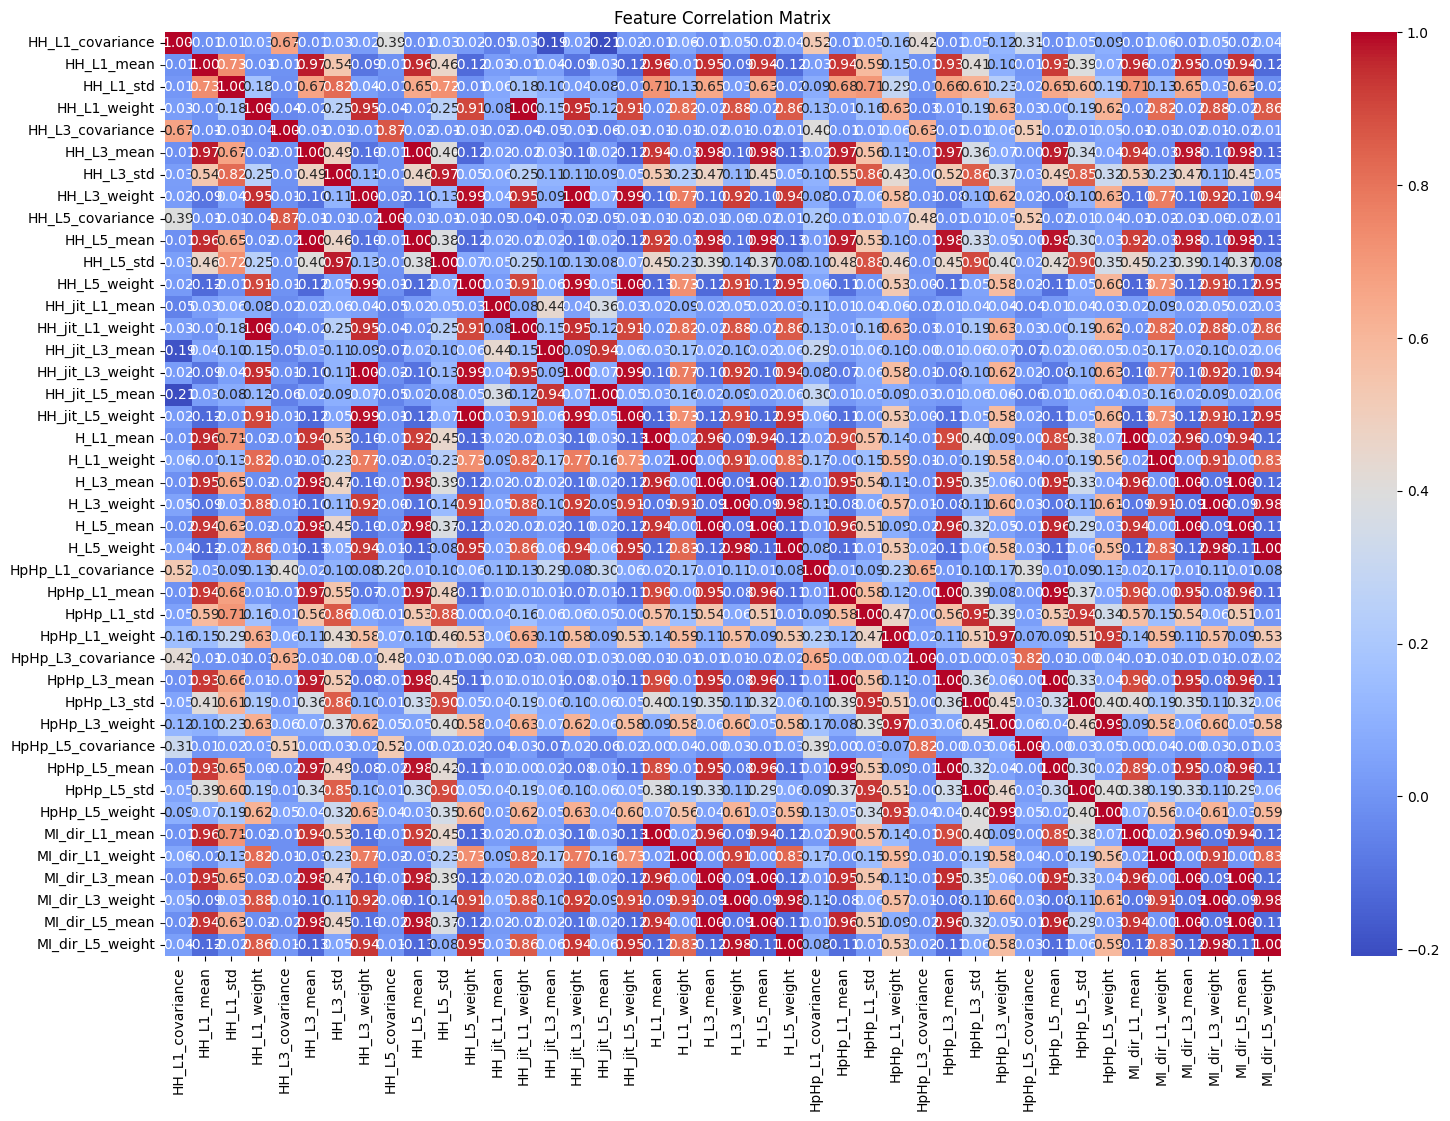

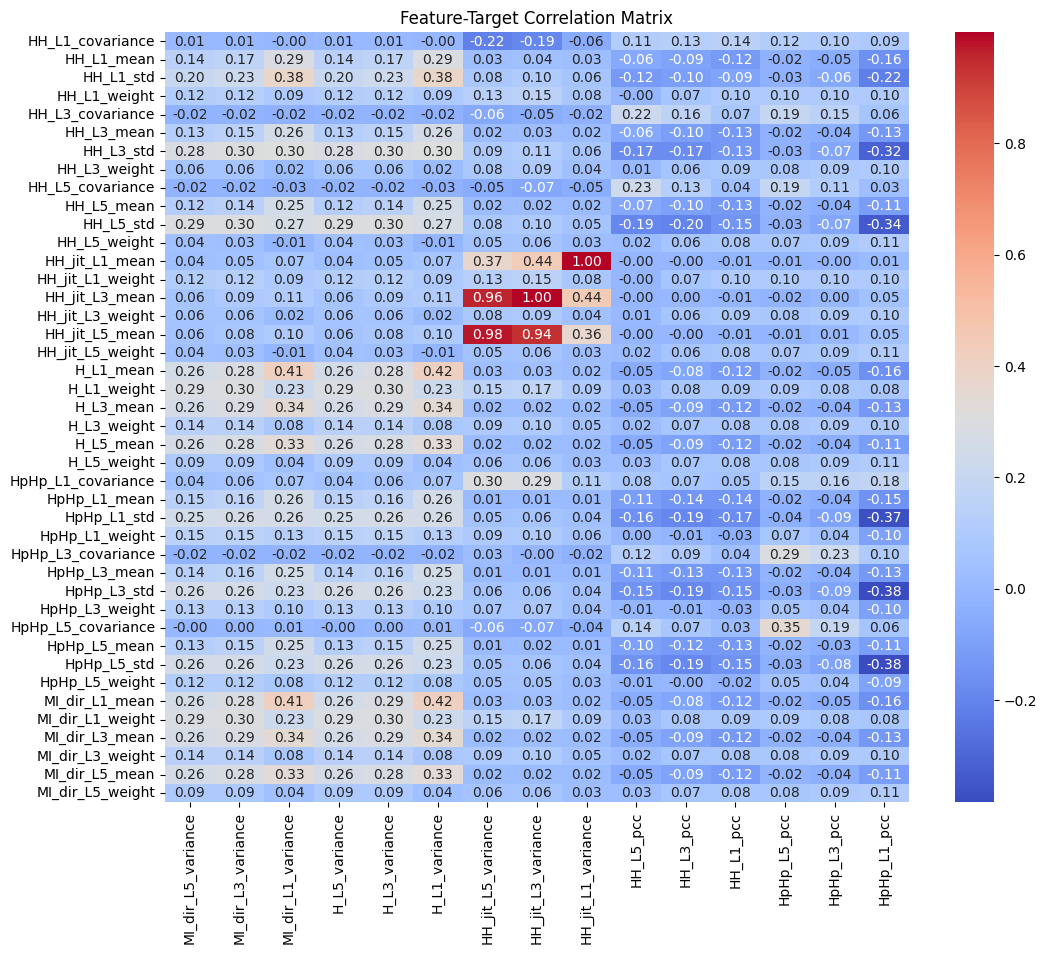

Descriptive Statistics for Features:
       HH_L1_covariance     HH_L1_mean      HH_L1_std   HH_L1_weight  \
count      1.652030e+05  165203.000000  165203.000000  165203.000000   
mean       1.909377e-01      72.462516       7.392543       1.965714   
std        2.846138e+02      16.402285      13.885055       1.229628   
min       -1.907815e+04      60.000000       0.000000       1.000000   
25%       -3.218735e-03      66.000002       0.013573       1.048197   
50%       -4.420000e-09      66.013093       0.532647       1.576149   
75%        1.021523e-03      70.514283       7.306561       2.310288   
max        2.437077e+04     377.148493     198.526888      30.176060   

       HH_L3_covariance     HH_L3_mean     HH_L3_std   HH_L3_weight  \
count      1.652030e+05  165203.000000  1.652030e+05  165203.000000   
mean      -4.210593e-04      72.741523  3.835700e+00       1.727441   
std        1.826429e+02      19.744155  1.076674e+01       1.033609   
min       -1.657185e+04      6

In [ ]:
# Define target columns
target_columns = [
    'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]

# Extract feature columns (excluding target columns)
feature_columns = df_cleaned.columns.difference(target_columns)

# Extract features and targets
X = df_cleaned[feature_columns]
y = df_cleaned[target_columns]

# Compute correlation matrix for features
feature_correlation_matrix = X.corr()

# Plot the correlation matrix for features
plt.figure(figsize=(18, 12))
sns.heatmap(feature_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Compute correlation matrix for features with each target variable
target_correlation_matrix = pd.DataFrame({target: X.corrwith(df_cleaned[target]) for target in target_columns})

# Plot the correlation matrix for features with each target variable
plt.figure(figsize=(12, 10))
sns.heatmap(target_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature-Target Correlation Matrix')
plt.show()

# Descriptive statistics for features
print("Descriptive Statistics for Features:")
print(X.describe())

# Descriptive statistics for target variables
print("\nDescriptive Statistics for Target Variables:")
print(y.describe())


In [ ]:
# Define features
target_columns = [
                     'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]
feature_columns = df.columns.difference(target_columns)

X = df_cleaned[feature_columns]

# Compute the correlation matrix for features
correlation_matrix = X.corr()
# Define the threshold for highly correlated features
high_corr_threshold = 3
# Extract pairs of highly correlated features
def get_highly_correlated_features(corr_matrix, threshold):
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return corr_pairs

high_corr_pairs = get_highly_correlated_features(correlation_matrix, high_corr_threshold)

# Print the highly correlated pairs
print("Highly Correlated Features (Correlation > 3):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Highly Correlated Features (Correlation > 3):


Distance Matrix:
                    HH_L1_covariance  HH_L1_mean  HH_L1_std  HH_L1_weight  \
HH_L1_covariance            0.000000    1.005964   0.990738      0.970864   
HH_L1_mean                  1.005964    0.000000   0.266726      1.008177   
HH_L1_std                   0.990738    0.266726   0.000000      0.823977   
HH_L1_weight                0.970864    1.008177   0.823977      0.000000   
HH_L3_covariance            0.330846    1.009343   1.011614      1.035861   
HH_L3_mean                  1.011435    0.027288   0.333887      1.020791   
HH_L3_std                   0.970974    0.461062   0.177541      0.752006   
HH_L3_weight                0.975311    1.093353   0.964346      0.047294   
HH_L5_covariance            0.607100    1.006482   1.012266      1.039900   
HH_L5_mean                  1.013670    0.042766   0.353533      1.019460   
HH_L5_std                   0.967694    0.542774   0.276769      0.751549   
HH_L5_weight                0.981891    1.120095   1.013900

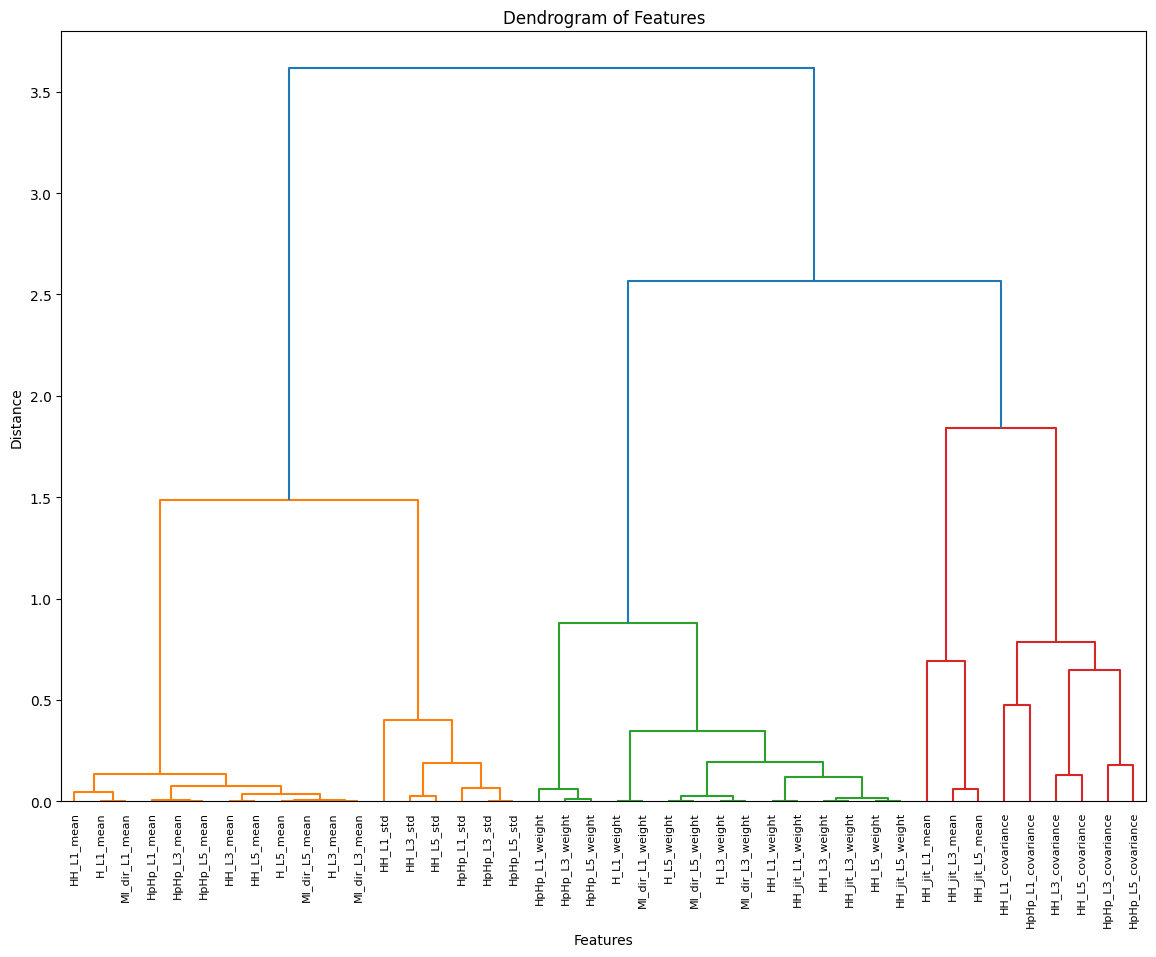

Cluster Summary:
   Cluster                                            Feature
0        1  [HH_L1_mean, HH_L3_mean, HH_L5_mean, H_L1_mean...
1        2  [HH_L1_std, HH_L3_std, HH_L5_std, HpHp_L1_std,...
2        3   [HpHp_L1_weight, HpHp_L3_weight, HpHp_L5_weight]
3        4  [HH_L1_weight, HH_L3_weight, HH_L5_weight, HH_...
4        5   [HH_jit_L1_mean, HH_jit_L3_mean, HH_jit_L5_mean]
5        6             [HH_L1_covariance, HpHp_L1_covariance]
6        7  [HH_L3_covariance, HH_L5_covariance, HpHp_L3_c...


In [ ]:
# Assuming X is your DataFrame of feature columns
correlation_matrix = X.corr()

# Convert correlation matrix to distance matrix
distance_matrix = 1 - correlation_matrix

# Make sure the distance matrix is in condensed form
condensed_distance_matrix = squareform(distance_matrix)

# Create linkage matrix
linkage_matrix = sch.linkage(condensed_distance_matrix, method='ward')

print("Distance Matrix:")
print(distance_matrix)

print("Condensed Distance Matrix:")
print(condensed_distance_matrix)

# Plot dendrogram
plt.figure(figsize=(14, 10))
dendrogram = sch.dendrogram(linkage_matrix, labels=X.columns, leaf_rotation=90)
plt.title('Dendrogram of Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

# Generate cluster labels
max_d = 0.7  # Example threshold for distance to form clusters, you can adjust this
cluster_labels = fcluster(linkage_matrix, max_d, criterion='distance')

# Create a DataFrame to hold cluster information
feature_clusters = pd.DataFrame({
    'Feature': X.columns,
    'Cluster': cluster_labels
})

# Summarize clusters
cluster_summary = feature_clusters.groupby('Cluster')['Feature'].apply(list).reset_index()
print("Cluster Summary:")
print(cluster_summary)

               Feature  Cluster
0     HH_L1_covariance        3
1           HH_L1_mean        1
2            HH_L1_std        1
3         HH_L1_weight        2
4     HH_L3_covariance        3
5           HH_L3_mean        1
6            HH_L3_std        1
7         HH_L3_weight        2
8     HH_L5_covariance        3
9           HH_L5_mean        1
10           HH_L5_std        1
11        HH_L5_weight        2
12      HH_jit_L1_mean        3
13    HH_jit_L1_weight        2
14      HH_jit_L3_mean        3
15    HH_jit_L3_weight        2
16      HH_jit_L5_mean        3
17    HH_jit_L5_weight        2
18           H_L1_mean        1
19         H_L1_weight        2
20           H_L3_mean        1
21         H_L3_weight        2
22           H_L5_mean        1
23         H_L5_weight        2
24  HpHp_L1_covariance        3
25        HpHp_L1_mean        1
26         HpHp_L1_std        1
27      HpHp_L1_weight        2
28  HpHp_L3_covariance        3
29        HpHp_L3_mean        1
30      

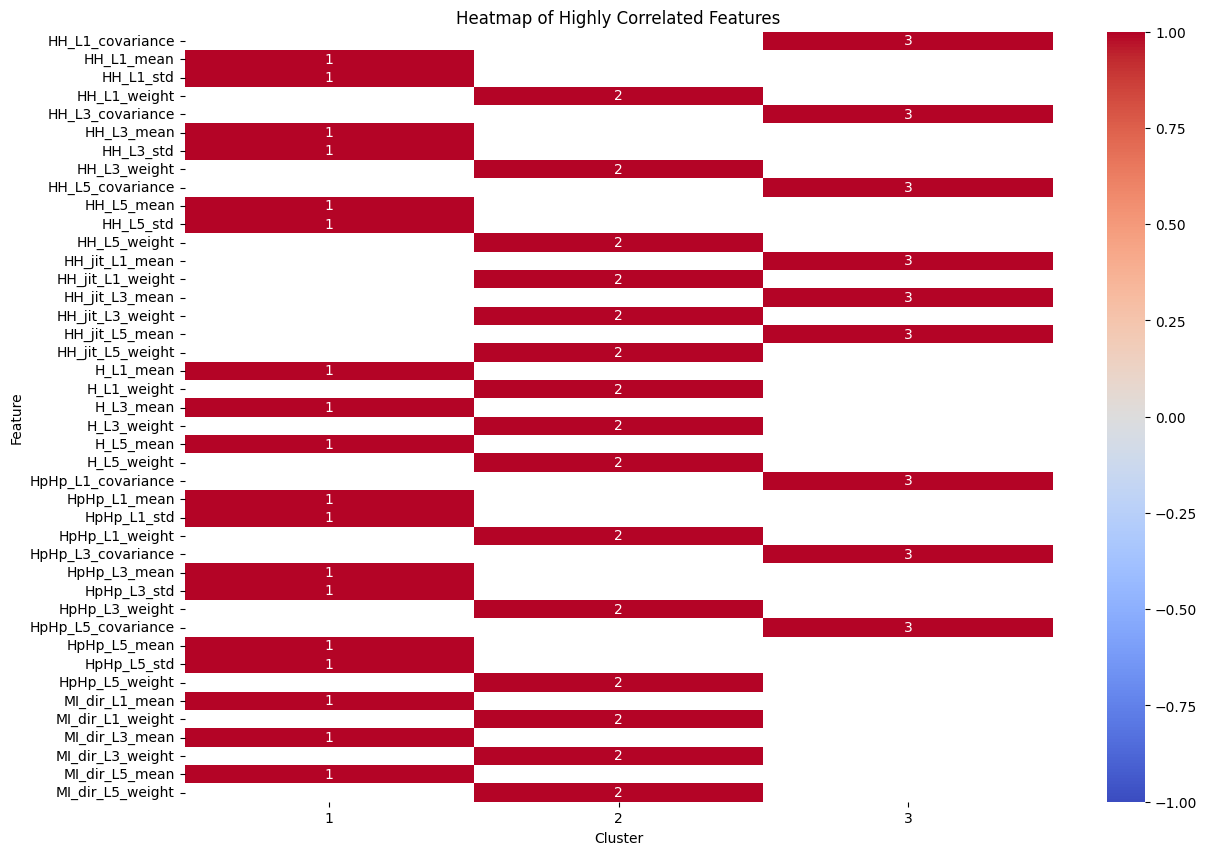

In [ ]:
# Define the maximum distance for clusters
max_distance = 2

# Get cluster labels
cluster_labels = fcluster(linkage_matrix, max_distance, criterion='distance')

# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})
print(feature_clusters)

# Create a pivot table for the heatmap
cluster_pivot = feature_clusters.pivot(index='Feature', columns='Cluster', values='Cluster')

plt.figure(figsize=(14, 10))
sns.heatmap(cluster_pivot, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Highly Correlated Features')
plt.show()

In [ ]:
# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})

# Select one feature per cluster
selected_features = feature_clusters.groupby('Cluster')['Feature'].first().values

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Validation Set Performance:
Accuracy: 0.8788991566119204
Precision: 0.33998665950935497
Recall: 0.8182230101719745
F1-Score: 0.324893728522991
Test Set Performance:
Accuracy: 0.8779932689281131
Precision: 0.336447303898912
Recall: 0.6816175124635246
F1-Score: 0.3178829525664839

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Validation Set Performance:
Accuracy: 0.8853960695694282
Precision: 0.340921516367435
Recall: 0.7951373467382673
F1-Score: 0.32793634599923255
Test Set Performance:
Accuracy: 0.8854507154790441
Precision: 0.33774080913888976
Recall: 0.7345999609409989
F1-Score: 0.32182203713732543

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Validation Set Performance:
Accuracy: 0.8803115289939873
Precision: 0.3370846798629313
Recall: 0.5552139515364409
F1-Score: 0.31982718383549347
Test Set Performance:
Accuracy: 0.8791554683905959


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Set Performance:
Accuracy: 0.9999596465033695
Precision: 0.9999798224374495
Recall: 0.75
F1-Score: 0.833323244348487
Test Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Validation Set Performance:
Accuracy: 0.8875751583874743
Precision: 0.33343330598019305
Recall: 0.4070157500089693
F1-Score: 0.3137761870047088
Test Set Performance:
Accuracy: 0.8885499140456647
Precision: 0.3336266937558603
Recall: 0.4867061089390951
F1-Score: 0.31435858942029604

--------------------------------------------------

Training model for target: HH_L5_pcc
Validation Set Performance:
Accuracy: 0.894152778338243
Precision: 0.41836221695141534
Recall: 0.7182676919571085
F1-Score: 0.4538130466988936
Test Set Performance:
Accuracy: 0.8937798116268372
Precision: 0.4134683154483773
Recall: 0.7502461706579484
F1-Score: 0.44993151966058953

------------------------------------------

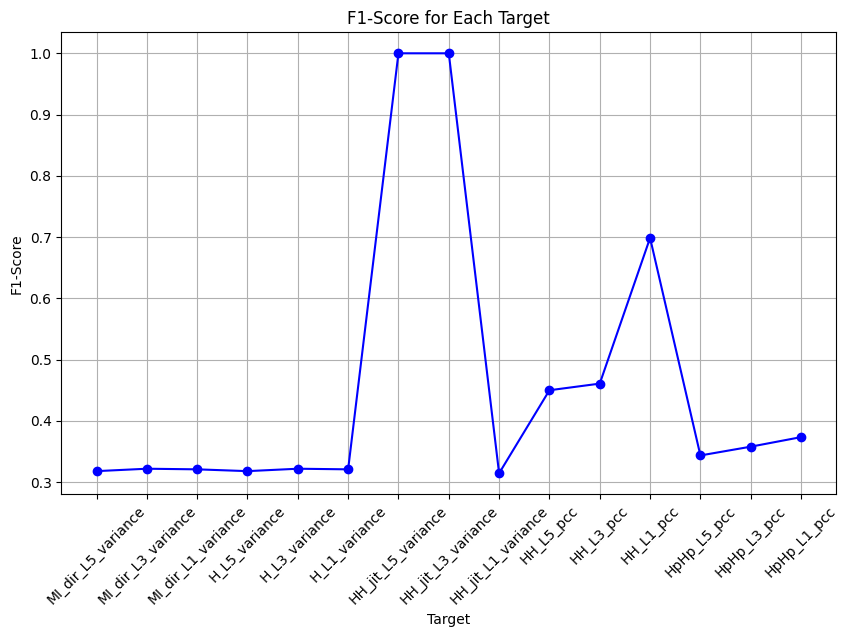

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the SVM model for classification
model = SVC(kernel='rbf', class_weight='balanced')

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Train the model
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Validation Set Performance:
Accuracy: 0.5591784028086033
Precision: 0.24976568132660418
Recall: 0.13987362215851737
F1-Score: 0.17932292879881978
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is i

Accuracy: 0.5636425268153313
Precision: 0.24973180569859252
Recall: 0.1409959782924702
F1-Score: 0.18023381851966555

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Validation Set Performance:
Accuracy: 0.5566764860175134
Precision: 0.24974654211021796
Recall: 0.13924778939718174
F1-Score: 0.17880288262131894
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is i

Accuracy: 0.5614391903343745
Precision: 0.24970923971570105
Recall: 0.14045161602946166
F1-Score: 0.17978259858270404

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Validation Set Performance:
Accuracy: 0.9983051531415197
Precision: 0.2496367305751766
Recall: 0.24993938169327137
F1-Score: 0.2497879644588045
Test Set Performance:
Accuracy: 0.9988862255151207
Precision: 0.2497517919411081
Recall: 0.24996970431410567
F1-Score: 0.24986070061533988

--------------------------------------------------

Training model for target: H_L5_variance
Validation Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Accuracy: 0.5591784028086033
Precision: 0.24976568132660418
Recall: 0.13987362215851737
F1-Score: 0.17932292879881978
Test Set Performance:
Accuracy: 0.5636425268153313
Precision: 0.24973180569859252
Recall: 0.1409959782924702
F1-Score: 0.18023381851966555

--------------------------------------------------

Training model for target: H_L3_variance
Validation Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Accuracy: 0.5566764860175134
Precision: 0.24974654211021796
Recall: 0.13924778939718174
F1-Score: 0.17880288262131894
Test Set Performance:
Accuracy: 0.5614391903343745
Precision: 0.24970923971570105
Recall: 0.14045161602946166
F1-Score: 0.17978259858270404

--------------------------------------------------

Training model for target: H_L1_variance
Validation Set Performance:
Accuracy: 0.9983051531415197

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall


Precision: 0.2496367305751766
Recall: 0.24993938169327137
F1-Score: 0.2497879644588045
Test Set Performance:
Accuracy: 0.9988862255151207
Precision: 0.2497517919411081
Recall: 0.24996970431410567
F1-Score: 0.24986070061533988

--------------------------------------------------

Training model for target: HH_jit_L5_variance
Validation Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Accuracy: 0.49755861345385577
Precision: 0.33327927343496594
Recall: 0.16586625771822913
F1-Score: 0.22149766915469807
Test Set Performance:
Accuracy: 0.49860778189390087
Precision: 0.2499757222626851
Recall: 0.12465798203346327
F1-Score: 0.16635699744724852

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Validation Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Accuracy: 0.48242605221742463
Precision: 0.33327757798778956
Recall: 0.16082166350538762
F1-Score: 0.21695339721254356
Test Set Performance:
Accuracy: 0.483160214038401
Precision: 0.333299928178918
Recall: 0.16106120406466662
F1-Score: 0.21717600452744767

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Validation Set Performance:
Accuracy: 0.5227795488479077
Precision: 0.2499228335519716

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall


Recall: 0.1307212625121085
F1-Score: 0.17165761229627663
Test Set Performance:
Accuracy: 0.5263552940606765
Precision: 0.24993101862497125
Recall: 0.13162387987406152
F1-Score: 0.17243594828270006

--------------------------------------------------

Training model for target: HH_L5_pcc
Validation Set Performance:
Accuracy: 0.9825672894556313
Precision: 0.5776402740205381
Recall: 0.3409565600036412
F1-Score: 0.3453444055585837
Test Set Performance:
Accuracy: 0.9844071572116898
Precision: 0.7115313809558413
Recall: 0.3445876477756044
F1-Score: 0.352674298645755

--------------------------------------------------

Training model for target: HH_L3_pcc
Validation Set Performance:
Accuracy: 0.9672329607360478
Precision: 0.4502567674891303
Recall: 0.2538282891427711
F1-Score: 0.25357920336709855
Test Set Performance:
Accuracy: 0.9673615650952762
Precision: 0.49190246620475797
Recall: 0.253923458313395
F1-Score: 0.2536818480785203

--------------------------------------------------

Training 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Set Performance:
Accuracy: 0.9152576570759856
Precision: 0.28987881725642267
Recall: 0.20047795580013433
F1-Score: 0.19233763619449734
Test Set Performance:
Accuracy: 0.9168785259436818
Precision: 0.18350900147803542
Recall: 0.1999260862678845
F1-Score: 0.19136608846158704

--------------------------------------------------

Training model for target: HpHp_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Set Performance:
Accuracy: 0.9943505104717324
Precision: 0.3314903005354212
Recall: 0.3332927555050587
F1-Score: 0.3323890844832936
Test Set Performance:
Accuracy: 0.9951090772620518
Precision: 0.33171908924348453
Recall: 0.33331711312782336
F1-Score: 0.33251618122977344

--------------------------------------------------

Training model for target: HpHp_L3_pcc
Validation Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9914854122109681
Precision: 0.41386837254981096
Recall: 0.33578019879440496
F1-Score: 0.3367390281366777
Test Set Performance:
Accuracy: 0.991235079053776
Precision: 0.49711815561959655
Recall: 0.3380096054776785
F1-Score: 0.34104028788140117

--------------------------------------------------

Training model for target: HpHp_L1_pcc
Validation Set Performance:
Accuracy: 0.9743351761430128
Precision: 0.4520237710655252
Recall: 0.254911440546082
F1-Score: 0.256462514112124
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9774097479479916
Precision: 0.7031455015757722
Recall: 0.34231922316753405
F1-Score: 0.3471353072384036

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.7725640218558066
Average Precision: 0.3500345292569911
Average Recall: 0.2194840531582791
Average F1-Score: 0.23960914648188367


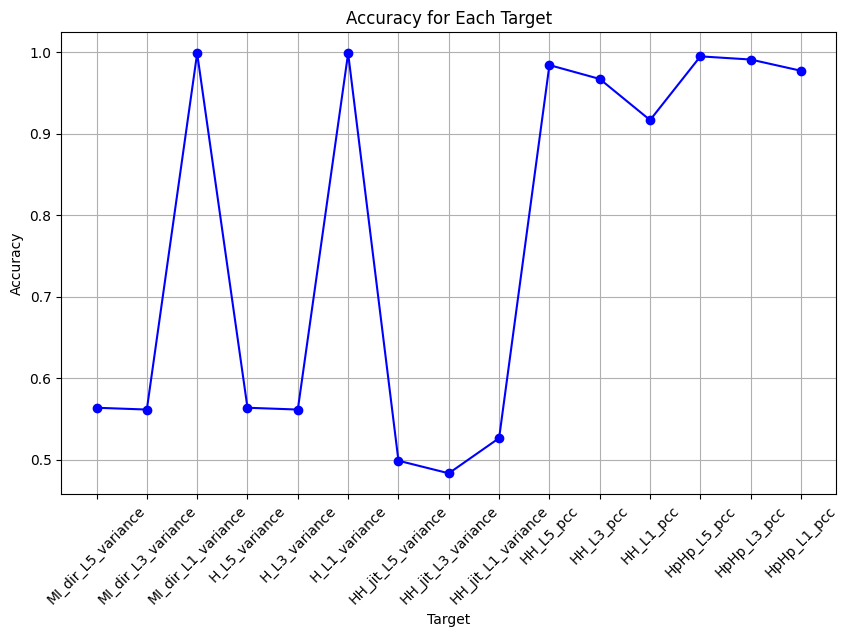

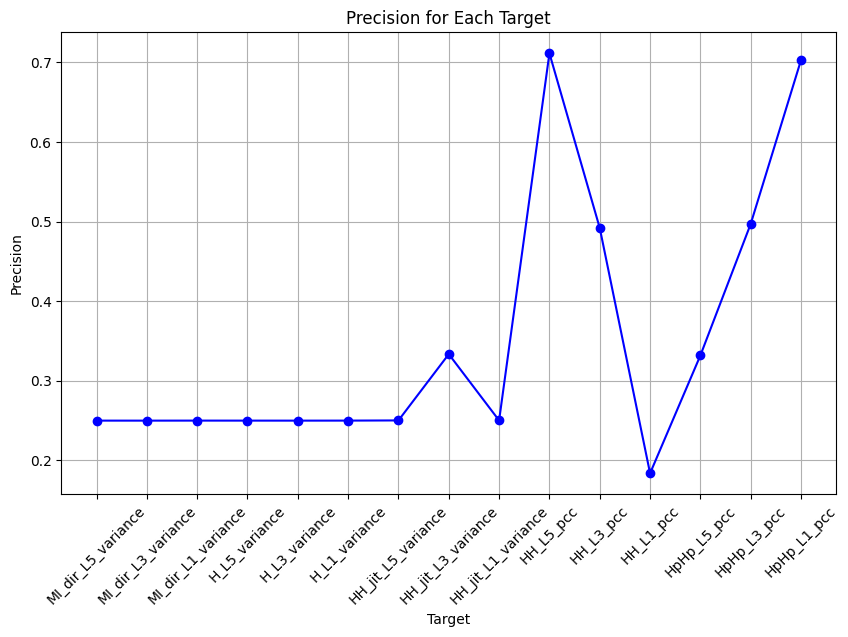

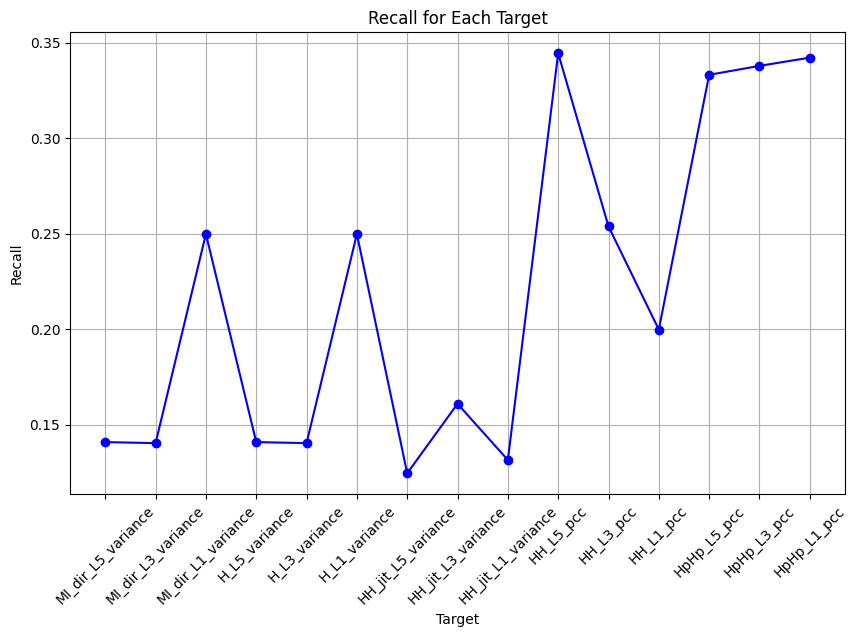

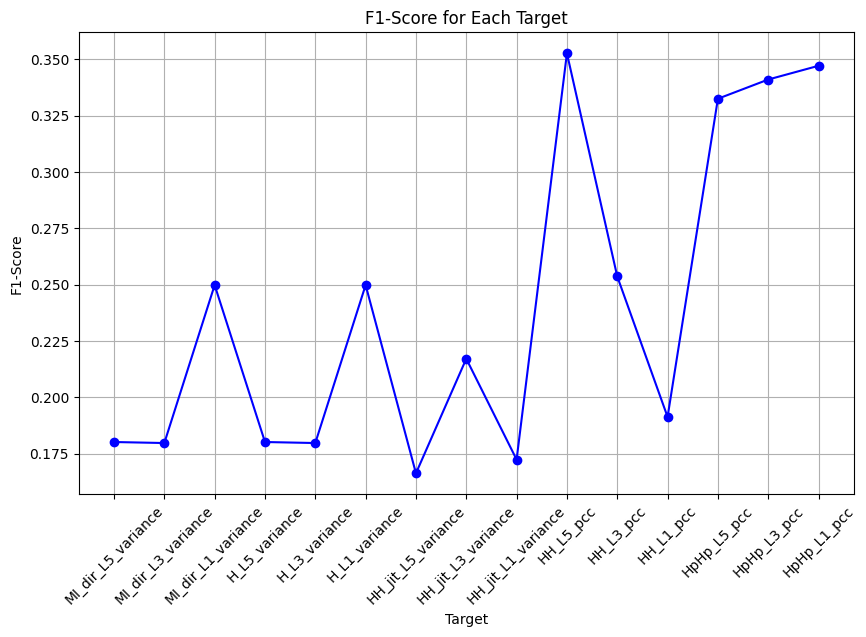

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Train the model
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Discretize the continuous predictions into bins
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.99964691 0.99969734 0.99964689 0.99969734 0.99969734]
Mean Cross-Validation Accuracy: 0.9996771625614359
Validation Set Performance:
Accuracy: 0.9995561115370647
Precision: 0.4999192702026318
Recall: 0.3408989968322952
F1-Score: 0.38328791640593984
Test Set Performance:
Accuracy: 0.9993220503135517
Precision: 0.30545867275951805
Recall: 0.2999697160577575
F1-Score: 0.30256799114169275

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99959647 0.99964689 0.99969734 0.99964689 0.99959645]
Mean Cross-Validation Accuracy: 0.9996368079452269
Validation Set Performance:
Accuracy: 0.9996368185303256
Precision: 0.4999394477636041
Recall: 0.39998990592320427
F1-Score: 0.4374646742970185
Test Set Performance:
Accuracy: 0.9992736253359483
Precision: 0.31807887522432754
Recall: 0.3181454756901769
F1-Score: 0.31811217102039424

--------------------------------------------------

Training model for target: MI_dir_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99944515 0.999546   0.999546   0.99939467 0.999546  ]
Mean Cross-Validation Accuracy: 0.9994955665340495
Validation Set Performance:
Accuracy: 0.9986683346111941
Precision: 0.5412630013859174
Recall: 0.3974089559662403
F1-Score: 0.4311571391349868
Test Set Performance:
Accuracy: 0.9991041379143362
Precision: 0.39984253113038426
Recall: 0.3356658126168548
F1-Score: 0.35898792622241216

--------------------------------------------------

Training model for target: H_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99964691 0.99969734 0.99964689 0.99969734 0.99969734]
Mean Cross-Validation Accuracy: 0.9996771625614359
Validation Set Performance:
Accuracy: 0.9995561115370647
Precision: 0.4999192702026318
Recall: 0.3408989968322952
F1-Score: 0.38328791640593984
Test Set Performance:
Accuracy: 0.9993220503135517
Precision: 0.30545867275951805
Recall: 0.2999697160577575
F1-Score: 0.30256799114169275

--------------------------------------------------

Training model for target: H_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99959647 0.99964689 0.99969734 0.99964689 0.99959645]
Mean Cross-Validation Accuracy: 0.9996368079452269
Validation Set Performance:
Accuracy: 0.9996368185303256
Precision: 0.4999394477636041
Recall: 0.39998990592320427
F1-Score: 0.4374646742970185
Test Set Performance:
Accuracy: 0.9992736253359483
Precision: 0.31807887522432754
Recall: 0.3181454756901769
F1-Score: 0.31811217102039424

--------------------------------------------------

Training model for target: H_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99944515 0.999546   0.999546   0.99939467 0.999546  ]
Mean Cross-Validation Accuracy: 0.9994955665340495
Validation Set Performance:
Accuracy: 0.9986683346111941
Precision: 0.5412630013859174
Recall: 0.3974089559662403
F1-Score: 0.4311571391349868
Test Set Performance:
Accuracy: 0.9991041379143362
Precision: 0.39984253113038426
Recall: 0.3356658126168548
F1-Score: 0.35898792622241216

--------------------------------------------------

Training model for target: HH_jit_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated

Cross-Validation Accuracy Scores: [0.99994956 0.99994956 0.99994956 0.99994956 0.99994956]
Mean Cross-Validation Accuracy: 0.9999495566025157
Validation Set Performance:
Accuracy: 0.999919293006739
Precision: 0.4999596465033695
Recall: 0.5
F1-Score: 0.49997982243744954
Test Set Performance:
Accuracy: 0.9999515750223965
Precision: 0.33331719167413215
Recall: 0.3333333333333333
F1-Score: 0.3333252623083131

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99994956 0.99994956 0.99994956 0.99994956 0.99994956]
Mean Cross-Validation Accuracy: 0.9999495566025157
Validation Set Performance:
Accuracy: 0.999919293006739
Precision: 0.4999596465033695
Recall: 0.5
F1-Score: 0.49997982243744954
Test Set Performance:
Accuracy: 0.9999515750223965
Precision: 0.49997578751119826
Recall: 0.5
F1-Score: 0.4999878934624697

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99984868 0.99984867 0.99969734 0.99989911 0.99989911]
Mean Cross-Validation Accuracy: 0.9998385810262722
Validation Set Performance:
Accuracy: 0.9997578790202171
Precision: 0.33326607479149856
Recall: 0.3333198794532343
F1-Score: 0.3332929749508973
Test Set Performance:
Accuracy: 0.9997094501343793
Precision: 0.3332445520581114
Recall: 0.3333252603535965
F1-Score: 0.33328490131977234

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.98633039 0.98718725 0.98774213 0.9883979  0.98718725]
Mean Cross-Validation Accuracy: 0.9873689837531181
Validation Set Performance:
Accuracy: 0.9828901174286752
Precision: 0.4014039953200156
Recall: 0.3351367914215079
F1-Score: 0.35856052584020115
Test Set Performance:
Accuracy: 0.9848671944989226
Precision: 0.4109384749476634
Recall: 0.3420404789538064
F1-Score: 0.36677610169670194

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.97598991 0.97755246 0.97482849 0.9759887  0.97578692]
Mean Cross-Validation Accuracy: 0.9760292979226015
Validation Set Performance:
Accuracy: 0.9651749324078931
Precision: 0.39934944888917967
Recall: 0.3466884523923719
F1-Score: 0.3670092537132473
Test Set Performance:
Accuracy: 0.9644076414614658
Precision: 0.407826034350103
Recall: 0.3542591589582061
F1-Score: 0.37526579248429826

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.97145019 0.97220541 0.97250807 0.97321429 0.97119653]
Mean Cross-Validation Accuracy: 0.9721148965880836
Validation Set Performance:
Accuracy: 0.9353940518945967
Precision: 0.4577143926025097
Recall: 0.43656247631116674
F1-Score: 0.44649525817971847
Test Set Performance:
Accuracy: 0.9351347425001816
Precision: 0.4542511505647062
Recall: 0.45251325544736665
F1-Score: 0.45337462547581986

--------------------------------------------------

Training model for target: HpHp_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.9956116  0.99601493 0.99606538 0.99616626 0.99566182]
Mean Cross-Validation Accuracy: 0.9959039990758523
Validation Set Performance:
Accuracy: 0.9938662685121665
Precision: 0.3937355069917785
Recall: 0.3058586930958067
F1-Score: 0.33024926203945243
Test Set Performance:
Accuracy: 0.9946248274860173
Precision: 0.42633065038281615
Recall: 0.3104770652087019
F1-Score: 0.3399303139582297

--------------------------------------------------

Training model for target: HpHp_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99278689 0.99329096 0.99278652 0.99369451 0.9929883 ]
Mean Cross-Validation Accuracy: 0.9931094351605605
Validation Set Performance:
Accuracy: 0.9915661192042291
Precision: 0.42483918904477097
Recall: 0.3530179336914645
F1-Score: 0.3794448467228324
Test Set Performance:
Accuracy: 0.9911866540761725
Precision: 0.4217932806960402
Recall: 0.3408620480229625
F1-Score: 0.36864925450015673

--------------------------------------------------

Training model for target: HpHp_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.98113493 0.98098265 0.98067998 0.98184019 0.98098265]
Mean Cross-Validation Accuracy: 0.9811240805596182
Validation Set Performance:
Accuracy: 0.9773213348936686
Precision: 0.42132691304982917
Recall: 0.3739334824387011
F1-Score: 0.39342547436269193
Test Set Performance:
Accuracy: 0.9783056100336553
Precision: 0.398640029905202
Recall: 0.38928379012802117
F1-Score: 0.3937397912936562

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.9895692598242173
Average Precision: 0.3822051540212288
Average Recall: 0.3509104266090382
Average F1-Score: 0.3615780075512278


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

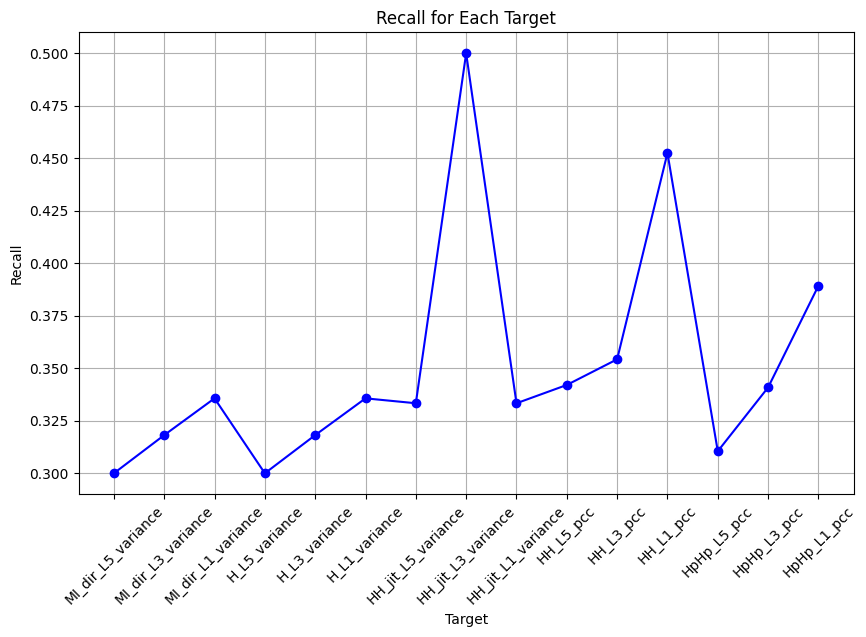

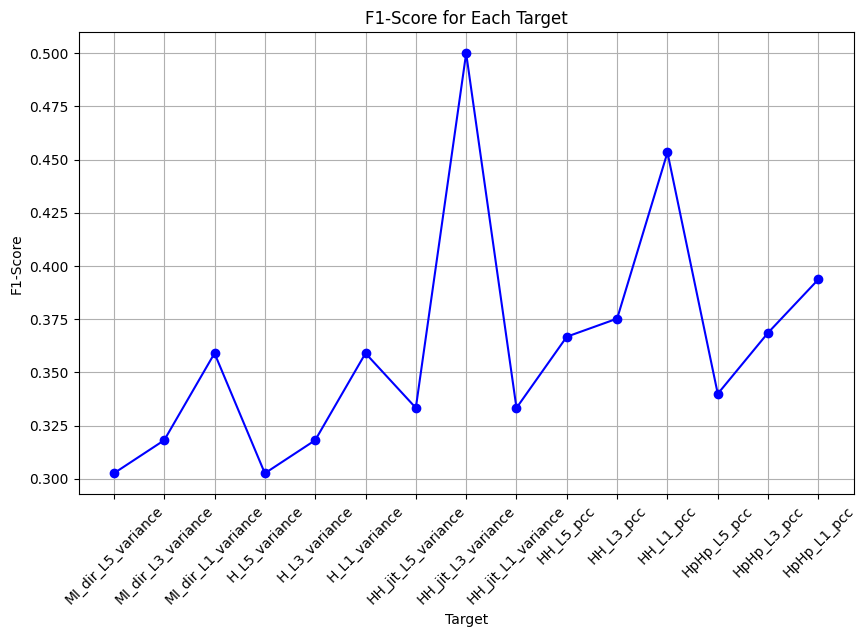

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(knn_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    knn_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = knn_model.predict(X_valid)
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = knn_model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.99929382 0.99914245 0.99909201 0.9991929  0.99894068]
Mean Cross-Validation Accuracy: 0.999132371934817
Validation Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

Accuracy: 0.9989104555909769
Precision: 0.3332390991209294
Recall: 0.3331583693355406
F1-Score: 0.3331987293382868
Test Set Performance:
Accuracy: 0.9988620130263189
Precision: 0.379500383698857
Recall: 0.4442264000602987
F1-Score: 0.39851915938310084

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.9991425  0.99909201 0.99914245 0.99914245 0.99883979]
Mean Cross-Validation Accuracy: 0.9990718407738413


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

Validation Set Performance:
Accuracy: 0.9989104555909769
Precision: 0.3332390991209294
Recall: 0.3331583693355406
F1-Score: 0.3331987293382868
Test Set Performance:
Accuracy: 0.9988378005375173
Precision: 0.37949230582818366
Recall: 0.43729002115940624
F1-Score: 0.397262242153748

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Cross-Validation Accuracy Scores: [0.99717528 0.99722559 0.99742736 0.9971247  0.9971247 ]
Mean Cross-Validation Accuracy: 0.9972155248659833
Validation Set Performance:
Accuracy: 0.9961664178201041
Precision: 0.3329287371203539
Recall: 0.33253855997844683
F1-Score: 0.33273353416496504
Test Set Performance:
Accuracy: 0.996755526500569
Precision: 0.33300976371328495
Recall: 0.332582000323154
F1-Score: 0.33279574456045047

--------------------------------------------------

Training model for target: H_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

Cross-Validation Accuracy Scores: [0.99929382 0.99914245 0.99909201 0.9991929  0.99894068]
Mean Cross-Validation Accuracy: 0.999132371934817
Validation Set Performance:
Accuracy: 0.9989104555909769
Precision: 0.3332390991209294
Recall: 0.3331583693355406
F1-Score: 0.3331987293382868
Test Set Performance:
Accuracy: 0.9988620130263189
Precision: 0.379500383698857
Recall: 0.4442264000602987
F1-Score: 0.39851915938310084

--------------------------------------------------

Training model for target: H_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

Cross-Validation Accuracy Scores: [0.9991425  0.99909201 0.99914245 0.99914245 0.99883979]
Mean Cross-Validation Accuracy: 0.9990718407738413
Validation Set Performance:
Accuracy: 0.9989104555909769
Precision: 0.3332390991209294
Recall: 0.3331583693355406
F1-Score: 0.3331987293382868
Test Set Performance:
Accuracy: 0.9988378005375173
Precision: 0.37949230582818366
Recall: 0.43729002115940624
F1-Score: 0.397262242153748

--------------------------------------------------

Training model for target: H_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

Cross-Validation Accuracy Scores: [0.99717528 0.99722559 0.99742736 0.9971247  0.9971247 ]
Mean Cross-Validation Accuracy: 0.9972155248659833
Validation Set Performance:
Accuracy: 0.9961664178201041
Precision: 0.3329287371203539
Recall: 0.33253855997844683
F1-Score: 0.33273353416496504
Test Set Performance:
Accuracy: 0.996755526500569
Precision: 0.33300976371328495
Recall: 0.332582000323154
F1-Score: 0.33279574456045047

--------------------------------------------------

Training model for target: HH_jit_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

Cross-Validation Accuracy Scores: [0.99904161 0.99868846 0.99878935 0.9991929  0.99889023]
Mean Cross-Validation Accuracy: 0.9989205100724968
Validation Set Performance:
Accuracy: 0.9986683346111941
Precision: 0.5285714285714286
Recall: 0.9993341135639049
F1-Score: 0.5537208889859067
Test Set Performance:
Accuracy: 0.9989830754703276
Precision: 0.6744186046511628
Recall: 0.9996610087411316
F1-Score: 0.6816485999585956

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99899117 0.99868846 0.99878935 0.99883979 0.99979822]
Mean Cross-Validation Accuracy: 0.999021398394141
Validation Set Performance:
Accuracy: 0.9987086881078245
Precision: 0.5294117647058824
Recall: 0.9993542919407563
F1-Score: 0.5552324929217874
Test Set Performance:
Accuracy: 0.9991041379143362
Precision: 0.5256410256410257
Recall: 0.999552047265067
F1-Score: 0.5485564110616216

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.98063052 0.97846045 0.71801856 0.99778047 0.97699758]
Mean Cross-Validation Accuracy: 0.9303775158341704
Validation Set Performance:
Accuracy: 0.9793793632218232
Precision: 0.35415293115762864
Recall: 0.6598186416962651
F1-Score: 0.3690827444263734
Test Set Performance:
Accuracy: 0.9799278467833709
Precision: 0.3517942030974767
Recall: 0.517173534465857
F1-Score: 0.36370900344483176

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.98310214 0.98294996 0.9834544  0.98400928 0.98320218]
Mean Cross-Validation Accuracy: 0.9833435925933841
Validation Set Performance:
Accuracy: 0.9803882006375852
Precision: 0.4338741918202708
Recall: 0.35869196360015554
F1-Score: 0.3718122549329122
Test Set Performance:
Accuracy: 0.9825185830851553
Precision: 0.4589808156874378
Recall: 0.3670962234167902
F1-Score: 0.3850377751537839

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.96812106 0.96665658 0.96806901 0.96751412 0.96756457]
Mean Cross-Validation Accuracy: 0.9675850673823723
Validation Set Performance:
Accuracy: 0.9661434163270247
Precision: 0.5686694448425306
Recall: 0.38086280187539395
F1-Score: 0.4037971911205396
Test Set Performance:
Accuracy: 0.9658361783007675
Precision: 0.5581566437105724
Recall: 0.3777537091559018
F1-Score: 0.3980396871690268

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.89972257 0.89593422 0.89653955 0.89346247 0.89558111]
Mean Cross-Validation Accuracy: 0.8962479850426501
Validation Set Performance:
Accuracy: 0.8901577821718252
Precision: 0.4520024353859872
Recall: 0.35343111235920693
F1-Score: 0.3635664864300617
Test Set Performance:
Accuracy: 0.8934892617612165
Precision: 0.46327187495833105
Recall: 0.3549830254506463
F1-Score: 0.3655715519414298

--------------------------------------------------

Training model for target: HpHp_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99359395 0.99364407 0.99399718 0.99354318 0.99344229]
Mean Cross-Validation Accuracy: 0.9936441324258773
Validation Set Performance:
Accuracy: 0.9923731891368387
Precision: 0.44123751294257835
Recall: 0.3952749615878282
F1-Score: 0.4080863579852661
Test Set Performance:
Accuracy: 0.9936321154451466
Precision: 0.44640081500297546
Recall: 0.4244799352047351
F1-Score: 0.42972262367844377

--------------------------------------------------

Training model for target: HpHp_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99001261 0.98950767 0.98996166 0.98940678 0.98950767]
Mean Cross-Validation Accuracy: 0.9896792775160377
Validation Set Performance:
Accuracy: 0.9894677373794439
Precision: 0.47768903903480014
Recall: 0.406736246598145
F1-Score: 0.4303857212313786
Test Set Performance:
Accuracy: 0.9896854797704656
Precision: 0.47307580126599524
Recall: 0.40746819686624
F1-Score: 0.42890918612702045

--------------------------------------------------

Training model for target: HpHp_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.97407314 0.97346651 0.97397094 0.97346651 0.97361784]
Mean Cross-Validation Accuracy: 0.9737189863484668
Validation Set Performance:
Accuracy: 0.9723578548081191
Precision: 0.44572436882860056
Recall: 0.3783955519551729
F1-Score: 0.39554620966328286
Test Set Performance:
Accuracy: 0.9765380983511295
Precision: 0.4889640762998467
Recall: 0.38607436402616413
F1-Score: 0.4100579159029875

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.9845750304673816
Average Precision: 0.4416472511196984
Average Recall: 0.4841625925118835
Average F1-Score: 0.4178938031088226


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


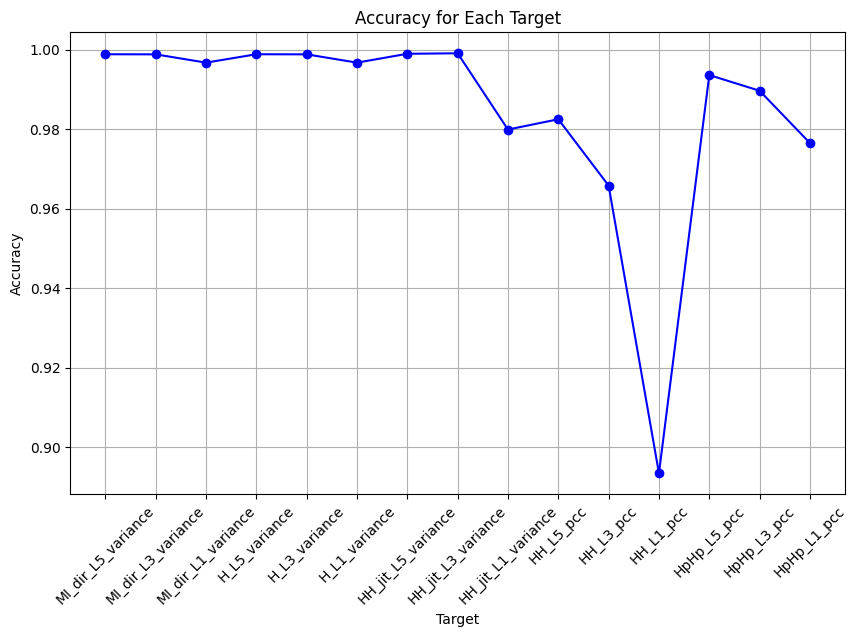

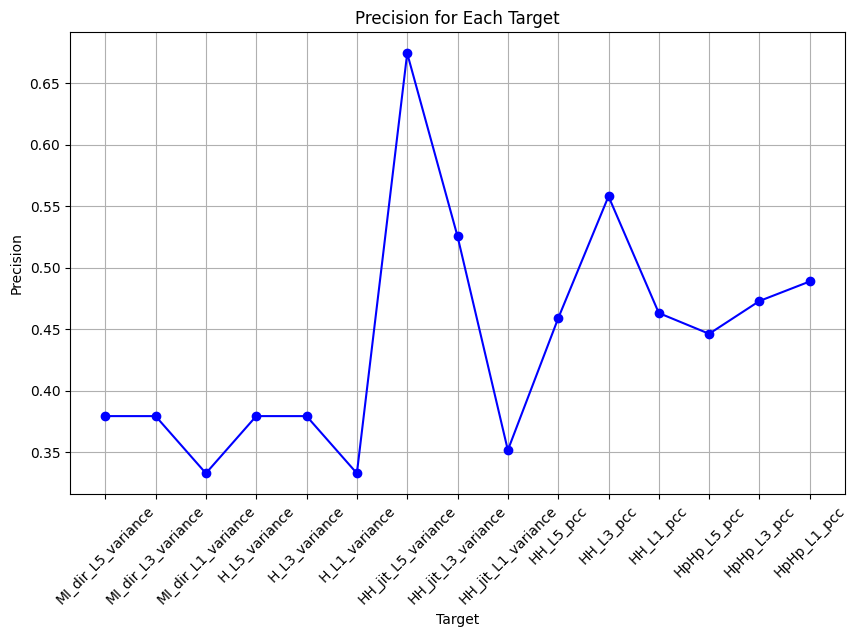

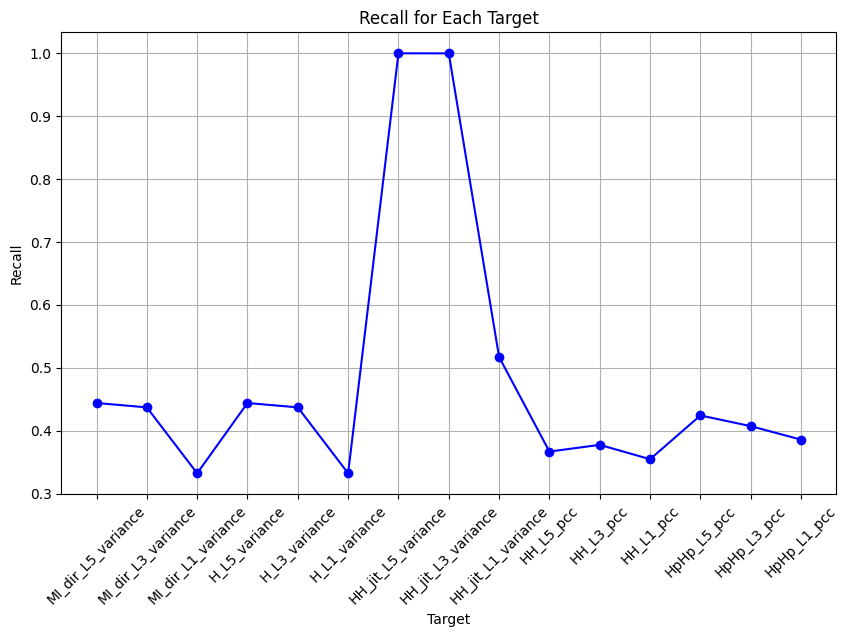

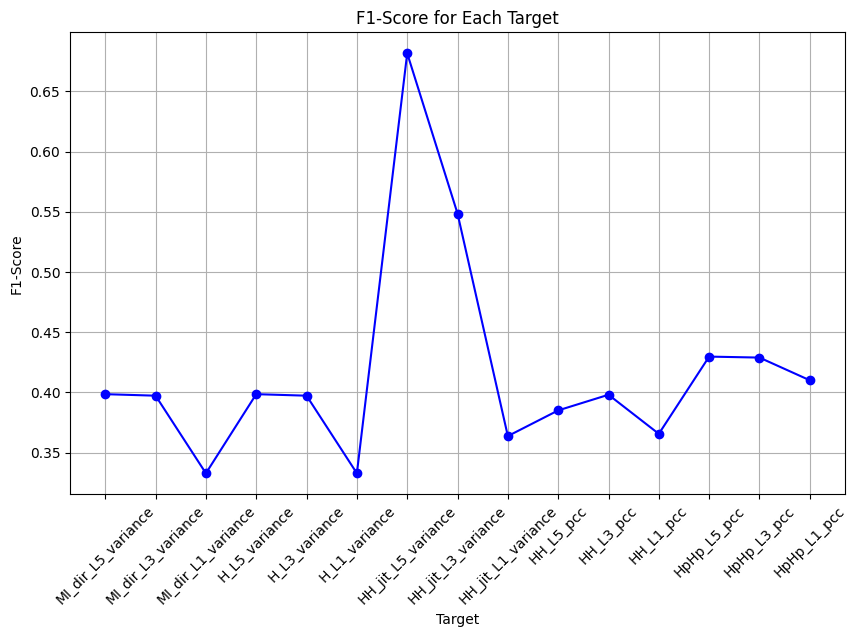

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Naive Bayes model (Gaussian Naive Bayes for continuous features)
nb_model = GaussianNB()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(nb_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    nb_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = nb_model.predict(X_valid)
    y_valid_pred_binned = bin_targets(pd.DataFrame(y_valid_pred, columns=[target]))

    # Predict on the test set
    y_test_pred = nb_model.predict(X_test)
    y_test_pred_binned = bin_targets(pd.DataFrame(y_test_pred, columns=[target]))

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned[target])
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned[target])
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.99959647 0.999546   0.99949556 0.99964689 0.99979822]
Mean Cross-Validation Accuracy: 0.9996166303826766
Validation Set Performance:
Accuracy: 0.9994754045438037
Precision: 0.6495188036259032
Recall: 0.7978586690582491
F1-Score: 0.7036162128734157
Test Set Performance:
Accuracy: 0.9995883876903707
Precision: 0.8124353973868242
Recall: 0.7221737679146343
F1-Score: 0.724885196285734

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.99959647 0.99944512 0.99959645 0.999546   0.999546  ]
Mean Cross-Validation Accuracy: 0.9995460089137499
Validation Set Performance:
Accuracy: 0.9993946975505428
Precision: 0.6120808243990796
Recall: 0.7331987456427235
F1-Score: 0.6507061564303069
Test Set Performance:
Accuracy: 0.9994431127575604
Precision: 0.705314516881681
Recall: 0.7120323749194224
F1-Score: 0.6917029747114597

------------

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99989912 1.         1.         0.99994956 0.99994956]
Mean Cross-Validation Accuracy: 0.9999596458926829
Validation Set Performance:
Accuracy: 0.9998385860134781
Precision: 0.333319880539188
Recall: 0.33330642883086486
F1-Score: 0.3333131545493069
Test Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99984868 0.99989911 0.99994956 0.99994956 0.99994956]
Mean Cross-Validation Accuracy: 0.9999192912764739
Validation Set Performance:
Accuracy: 0.999919293006739
Precision: 0.7499798216231486
Recall: 0.7499798216231486
F1-Score: 0.7499798216231486
Test Set Performance:
Accuracy: 0.9999515750223965
Precision: 0.75
Recall: 0.9999757863386523
F1-Score: 0.8333212262095017

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99974779 0.99994956 0.99984867 0.99989911 0.99989911]
Mean Cross-Validation Accuracy: 0.9998688483878816
Validation Set Performance:
Accuracy: 0.9996771720269562
Precision: 0.41662630339724177
Recall: 0.4443906289240484
F1-Score: 0.42852433904077664
Test Set Performance:
Accuracy: 0.9997578751119828
Precision: 0.809475373991503
Recall: 0.6428248509381956
F1-Score: 0.6983723344915856

--------------------------------------------------

Training model for target: HH_L5_pcc
Cross-Validation Accuracy Scores: [0.98653216 0.98683414 0.9863297  0.98673325 0.98723769]
Mean Cross-Validation Accuracy: 0.9867333884972117
Validation Set Performance:
Accuracy: 0.9850288527500908
Precision: 0.7000544918113222
Recall: 0.6526377558360162
F1-Score: 0.6740518181695679
Test Set Performance:
Accuracy: 0.9863925812934311
Precision: 0.6914109094249942
Recall: 0.6982813470526555
F1-Score: 0.6947854591724639

--------------------------------------------------

Training mod

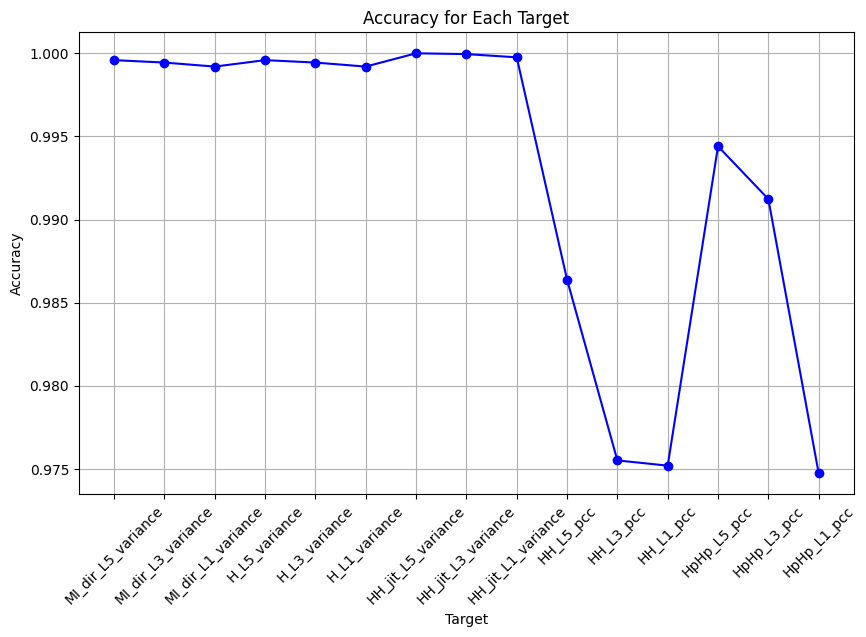

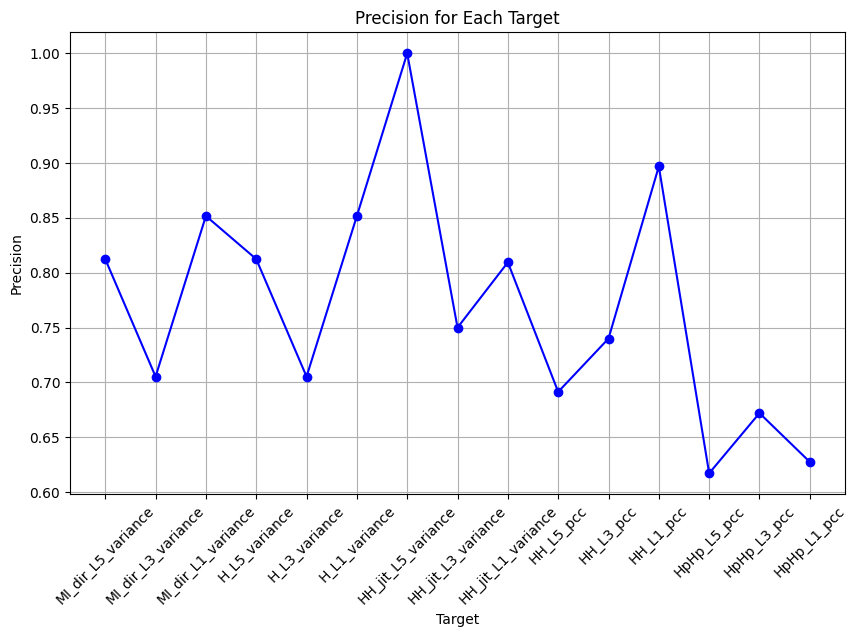

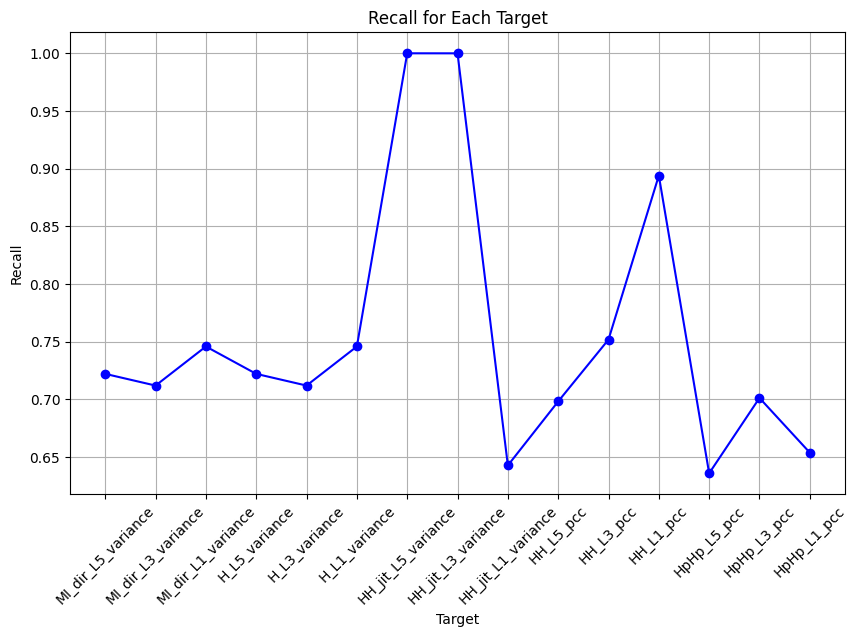

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Ensure target_columns is defined and not empty
if 'target_columns' in locals() and target_columns:
    # Train and evaluate the model for each target column
    for target in target_columns:
        print(f"Training model for target: {target}")

        # Initialize the Random Forest model
        rf_model = DecisionTreeClassifier(random_state=42)

        # Perform cross-validation
        cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
        print(f"Cross-Validation Accuracy Scores: {cv_scores}")
        print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

        # Train the model on the full training set
        rf_model.fit(X_train, y_train_binned[target])

        # Predict on the validation set
        y_valid_pred = rf_model.predict(X_valid)

        # Predict on the test set
        y_test_pred = rf_model.predict(X_test)

        # Generate classification performance metrics
        def generate_classification_metrics(y_true, y_pred):
            accuracy = accuracy_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred, average='macro')
            recall = recall_score(y_true, y_pred, average='macro')
            f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
            return accuracy, precision, recall, f1

        print("Validation Set Performance:")
        val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
        print(f"Accuracy: {val_accuracy}")
        print(f"Precision: {val_precision}")
        print(f"Recall: {val_recall}")
        print(f"F1-Score: {val_f1}")

        print("Test Set Performance:")
        test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
        print(f"Accuracy: {test_accuracy}")
        print(f"Precision: {test_precision}")
        print(f"Recall: {test_recall}")
        print(f"F1-Score: {test_f1}")

        print("\n" + "-"*50 + "\n")

        # Append metrics to overall lists
        overall_accuracy.append(test_accuracy)
        overall_precision.append(test_precision)
        overall_recall.append(test_recall)
        overall_f1.append(test_f1)

    # Calculate the overall performance metrics
    avg_accuracy = np.mean(overall_accuracy)
    avg_precision = np.mean(overall_precision)
    avg_recall = np.mean(overall_recall)
    avg_f1 = np.mean(overall_f1)

    print("Overall Performance on Test Set:")
    print(f"Average Accuracy: {avg_accuracy}")
    print(f"Average Precision: {avg_precision}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1-Score: {avg_f1}")

    # Define the plot_metrics function
    def plot_metrics(metrics, metric_name):
        plt.figure(figsize=(10, 6))
        plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
        plt.title(f'{metric_name} for Each Target')
        plt.xlabel('Target')
        plt.ylabel(metric_name)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

    # Plotting
    plot_metrics(overall_accuracy, 'Accuracy')
    plot_metrics(overall_precision, 'Precision')
    plot_metrics(overall_recall, 'Recall')
    plot_metrics(overall_f1, 'F1-Score')
else:
    print("Error: target_columns is not defined or is empty.")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.99974779 0.99974778 0.99969734 0.99969734 0.99974778]
Mean Cross-Validation Accuracy: 0.9997276054500283
Validation Set Performance:
Accuracy: 0.9997982325168476
Precision: 0.962909134406914
Recall: 0.797966339210737
F1-Score: 0.8666330217816984
Test Set Performance:
Accuracy: 0.9996126001791724
Precision: 0.8147260012828621
Recall: 0.6222060707863596
F1-Score: 0.6857529362031616

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.99974779 0.99974778 0.99969734 0.99964689 0.99969734]
Mean Cross-Validation Accuracy: 0.9997074278874779
Validation Set Performance:
Accuracy: 0.9997578790202171
Precision: 0.9582660503545813
Recall: 0.7333198745642724
F1-Score: 0.814774441767861
Test Set Performance:
Accuracy: 0.9996126001791724
Precision: 0.851754964362449
Recall: 0.6306737420725645
F1-Score: 0.7028460630087819

--------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99974779 0.99974778 0.99969734 0.99969734 0.99974778]
Mean Cross-Validation Accuracy: 0.9997276054500283
Validation Set Performance:
Accuracy: 0.9997982325168476
Precision: 0.962909134406914
Recall: 0.797966339210737
F1-Score: 0.8666330217816984
Test Set Performance:
Accuracy: 0.9996126001791724
Precision: 0.8147260012828621
Recall: 0.6222060707863596
F1-Score: 0.6857529362031616

--------------------------------------------------

Training model for target: H_L3_variance
Cross-Validation Accuracy Scores: [0.99974779 0.99974778 0.99969734 0.99964689 0.99969734]
Mean Cross-Validation Accuracy: 0.9997074278874779
Validation Set Performance:
Accuracy: 0.9997578790202171
Precision: 0.9582660503545813
Recall: 0.7333198745642724
F1-Score: 0.814774441767861
Test Set Performance:
Accuracy: 0.9996126001791724
Precision: 0.851754964362449
Recall: 0.6306737420725645
F1-Score: 0.7028460630087819

--------------------------------------------------

Training mode

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99994956 1.         1.         0.99994956 0.99994956]
Mean Cross-Validation Accuracy: 0.9999697341650663
Validation Set Performance:
Accuracy: 0.9998789395101085
Precision: 0.3333198810820991
Recall: 0.3333198810820991
F1-Score: 0.3333198810820991
Test Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99989912 1.         1.         0.99994956 0.99994956]
Mean Cross-Validation Accuracy: 0.9999596458926829
Validation Set Performance:
Accuracy: 0.999919293006739
Precision: 0.7499798216231486
Recall: 0.7499798216231486
F1-Score: 0.7499798216231486
Test Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99984868 0.99994956 0.99989911 0.99994956 0.99989911]
Mean Cross-Validation Accuracy: 0.9999092024951987
Validation Set Performance:
Accuracy: 0.9998385860134781
Precision: 0.4999596432462973
Recall: 0.4444444444444444
F1-Score: 0.4666464870682407
Test Set Performance:
Accuracy: 0.9998547250671896
Precision: 0.9999515691592405
Recall: 0.6428571428571429
F1-Score: 0.7555313383758883

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.98970996 0.9904661  0.9909201  0.99102098 0.9912732 ]
Mean Cross-Validation Accuracy: 0.9906780699156359
Validation Set Performance:
Accuracy: 0.9887413744400952
Precision: 0.8778989438786216
Recall: 0.6180793618040826
F1-Score: 0.706336965735462
Test Set Performance:
Accuracy: 0.99087189172175
Precision: 0.8744606729006703
Recall: 0.6702386037121482
F1-Score: 0.7482109050929745

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [0.98264817 0.98365617 0.98330307 0.98234463 0.98239508]
Mean Cross-Validation Accuracy: 0.9828694244534756
Validation Set Performance:
Accuracy: 0.9834147128848715
Precision: 0.8906726678766309
Recall: 0.7294743652347951
F1-Score: 0.795347250014482
Test Set Performance:
Accuracy: 0.9827122829955691
Precision: 0.8892603776355205
Recall: 0.721613314357399
F1-Score: 0.7892410152595492

--------------------------------------------------

Training model for

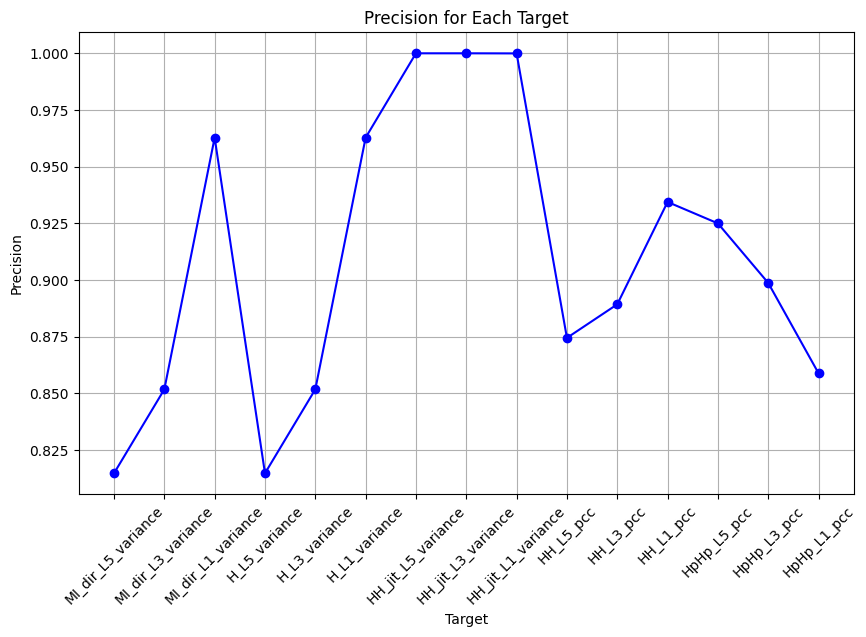

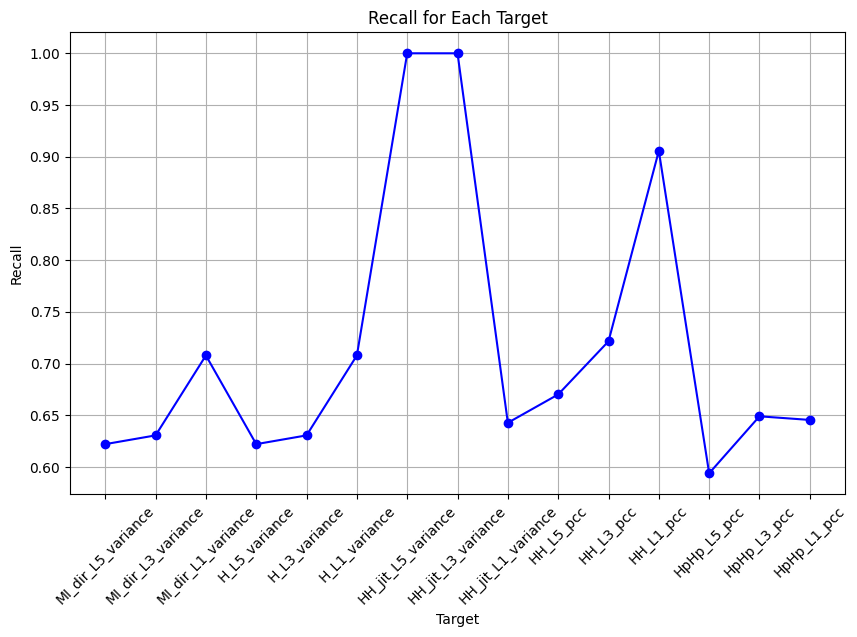

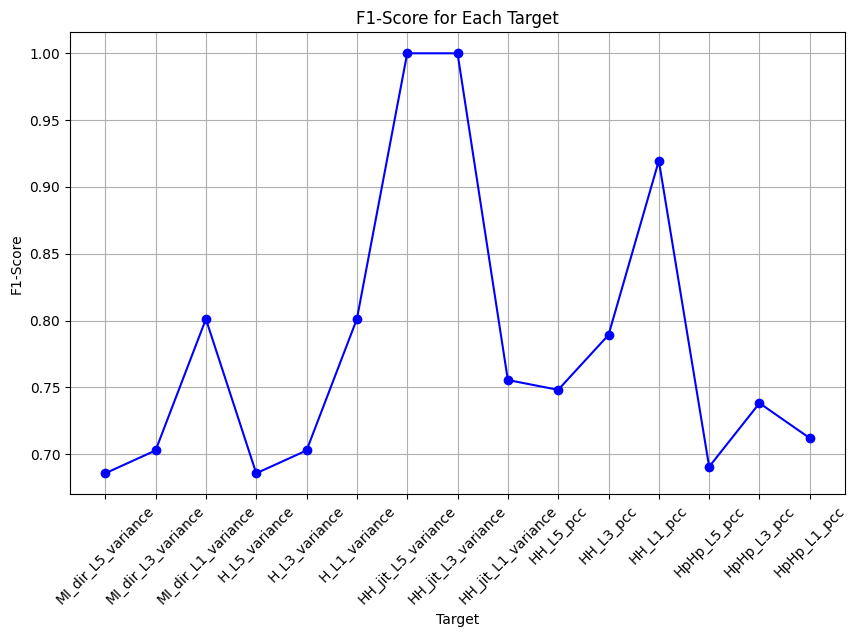

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    rf_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = rf_model.predict(X_valid)

    # Predict on the test set
    y_test_pred = rf_model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

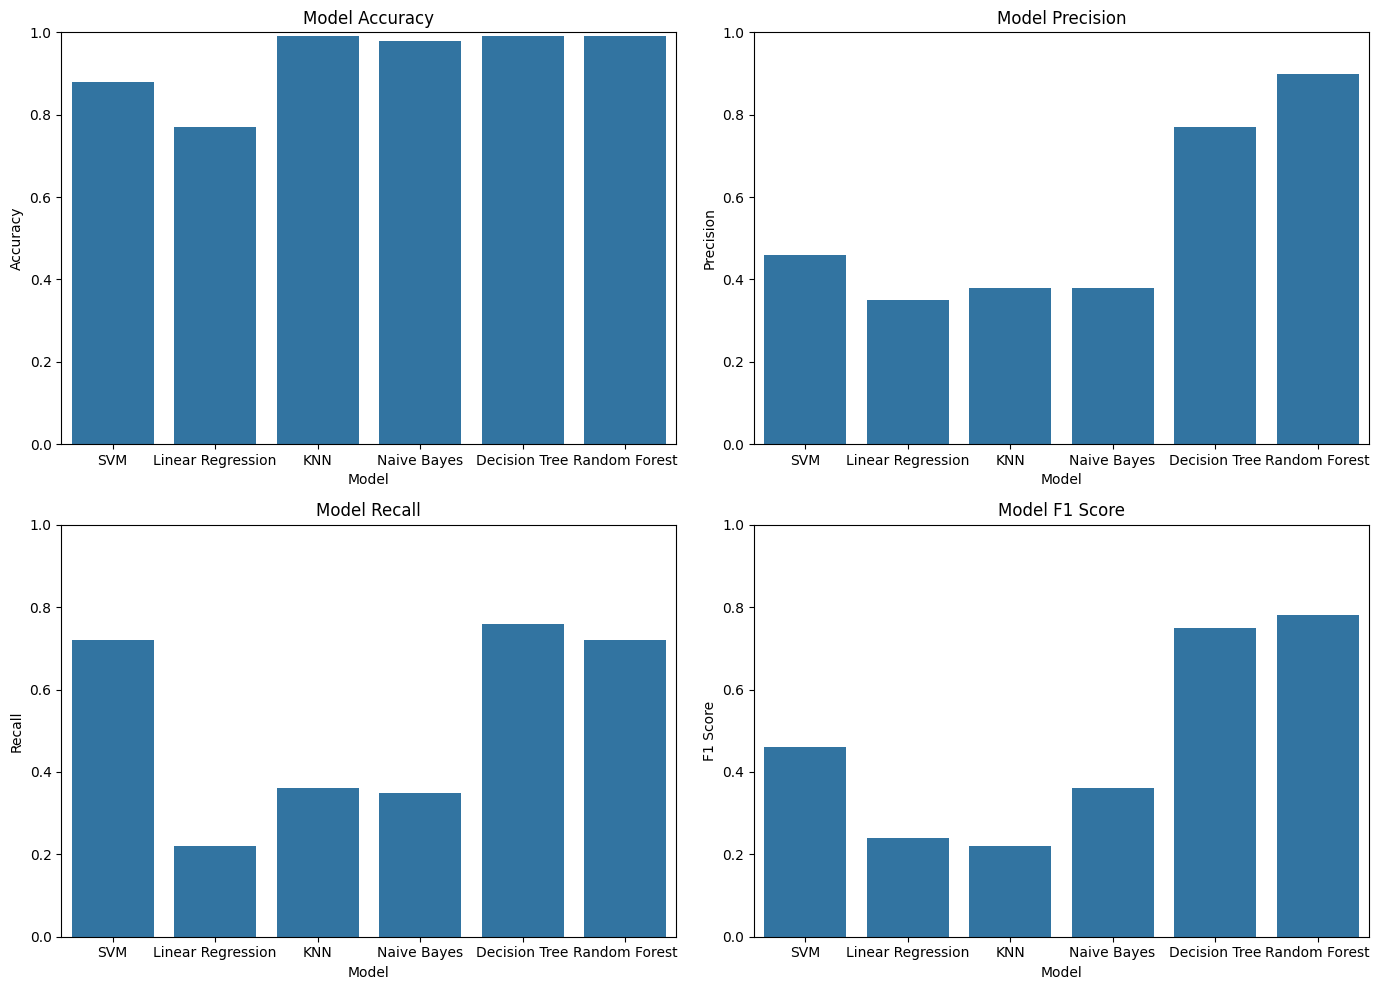

In [ ]:
data = {
    'Model': ['SVM', 'Linear Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.88, 0.77, 0.99, 0.98, 0.99, 0.99],
    'Precision': [0.46, 0.35, 0.38,0.38 ,0.77, 0.90],
    'Recall': [0.72, 0.22, 0.36, 0.35, 0.76, 0.72],
    'F1 Score': [0.46, 0.24, 0.22, 0.36, 0.75, 0.78]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(14, 10))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df)
plt.title('Model Accuracy')
plt.ylim(0, 1)

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=df)
plt.title('Model Precision')
plt.ylim(0, 1)

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=df)
plt.title('Model Recall')
plt.ylim(0, 1)

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=df)
plt.title('Model F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()